   # PROCESAMIENTO DE RESULTADOS

Primero se importan los datos 

In [416]:
library(readxl )
Datos <- read_excel("D:/TESIS_rev/TESIS_DATA/Datos_estadistica_ordenados_1.xlsx")

Luego se convierten los tibles a Dataframe y luego se reemplaza los nombres de los filas

In [417]:
Datos <- as.data.frame(Datos)
Datos <- data.frame(Datos[,-1], row.names=Datos[,1])

Crear Df solo numerico

In [418]:
#Creo las variables iniciales
#Datos concentraciones totales
Datos_CT<-Datos[,c(1:7,12,17,22,27,32,37,42,47,52,53)]
#Concentraciones totales solo numeros
Datos_Num <-Datos[,c(1:51)]
#Concentraciones totales solo numeros
Datos_Num_CT<-Datos_Num[,c(1:7,12,17,22,27,32,37,42,47)]
#Temporada seca  solo numeros
Datos_Num_TS<-Datos_Num[c(0:10),]
#Temporada humeda  solo numeros
Datos_Num_TH<-Datos_Num[c(11:20),]

# Correlación de datos 

In [419]:
#Todos los datos
Corr<-round(cor(Datos_Num),2)
#Temporada seca
Corr_TS<-round(cor(Datos_Num_TS),2)
#Temporada humeda
Corr_TH<-round(cor(Datos_Num_TH),2)
#Concentraciones totales
Corr_CT<-round(cor(Datos_Num_CT),2)

Warning message in cor(Datos_Num_TS):
"the standard deviation is zero"

In [421]:
# Solo triangulo superior para concentraciones totales
Upper_Corr_CT<-Corr_CT
Upper_Corr_CT[lower.tri(Upper_Corr_CT)]<-""
Upper_Corr_CT<-as.data.frame(Upper_Corr_CT)
print(Upper_Corr_CT)

    COT  CIC    pH    CE  CO3    OD   AlT   CrT   MnT   NiT   CuT   ZnT   AsT
COT   1 0.47 -0.51 -0.18 0.61 -0.15  0.28  0.18  0.56 -0.11  0.38  0.25   0.4
CIC        1  -0.3 -0.38 0.39 -0.05  0.88  0.38  0.61  0.39   0.4   0.2  0.45
pH               1 -0.37 -0.7  0.21  0.06  0.41  0.21  0.28  0.48  0.58  0.42
CE                     1 0.28 -0.36 -0.71 -0.28 -0.65 -0.54 -0.63 -0.62 -0.54
CO3                         1 -0.12 -0.01  0.06  0.14 -0.56 -0.06 -0.22  0.02
OD                                1  0.06 -0.22 -0.14 -0.31  0.09  0.15  0.14
AlT                                     1  0.43  0.72  0.66  0.56  0.42  0.56
CrT                                           1   0.8  0.36  0.84  0.76  0.82
MnT                                                 1  0.46  0.89  0.77  0.84
NiT                                                       1  0.37  0.35  0.26
CuT                                                             1  0.97  0.98
ZnT                                                             

 ## De ahora en adelante se usará los valores para la correlacion de concentraciones totales

In [26]:
#Tabla de valores de correlacion y pearson
library("Hmisc")
Corr_CT_1<- rcorr(as.matrix(Datos_1_Num_CT))
# flattenCorrMatrix
# cormat : matrix of the correlation coefficients
# pmat : matrix of the correlation p-values
flattenCorrMatrix <- function(cormat, pmat) {
  ut <- upper.tri(cormat)
  data.frame(
    row = rownames(cormat)[row(cormat)[ut]],
    column = rownames(cormat)[col(cormat)[ut]],
    cor  =(cormat)[ut],
    p = pmat[ut]
  )
}
flattenCorrMatrix(Corr_CT_1$r, Corr_CT_1$P)

row,column,cor,p
COT,CIC,0.46761089,3.761553e-02
COT,pH,-0.51230442,2.091895e-02
CIC,pH,-0.29971731,1.992019e-01
COT,CE,-0.18184922,4.428906e-01
CIC,CE,-0.38376038,9.484250e-02
pH,CE,-0.37301093,1.052686e-01
COT,CO3,0.61171622,4.154463e-03
CIC,CO3,0.38725857,9.161850e-02
pH,CO3,-0.70165080,5.652874e-04
CE,CO3,0.27679028,2.374449e-01


In [27]:
#Tabla con codificacion simbolica
symnum(Corr_CT, abbr.colnames = FALSE)

    COT CIC pH CE CO3 OD AlT CrT MnT NiT CuT ZnT AsT CdT PbT
COT 1                                                       
CIC .   1                                                   
pH  .       1                                               
CE      .   .  1                                            
CO3 ,   .   ,     1                                         
OD             .      1                                     
AlT     +      ,         1                                  
CrT     .   .            .   1                              
MnT .   ,      ,         ,   ,   1                          
NiT     .      .  .   .  ,   .   .   1                      
CuT .   .   .  ,         .   +   +   .   1                  
ZnT         .  ,         .   ,   ,   .   B   1              
AsT .   .   .  .         .   +   +       B   *   1          
CdT         .  ,         .   ,   ,   .   B   B   *   1      
PbT .   .   .  .         .   +   +   .   B   *   B   *   1  
attr(,"legend")
[1] 0 ' 

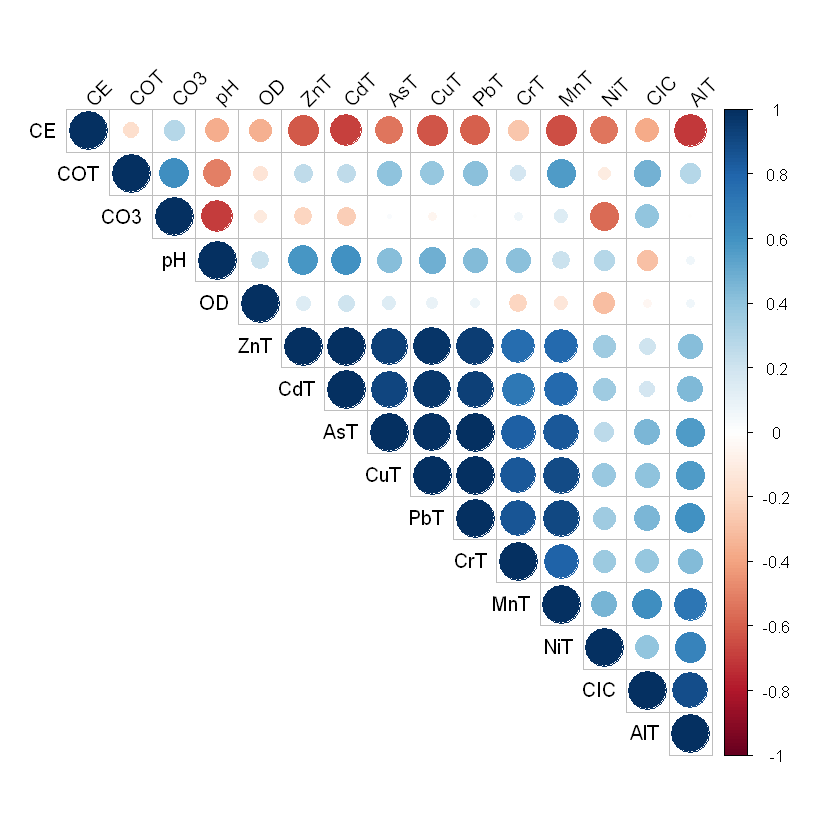

In [28]:
library(corrplot)
#Grafica sin numeros
corrplot(Corr_CT, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

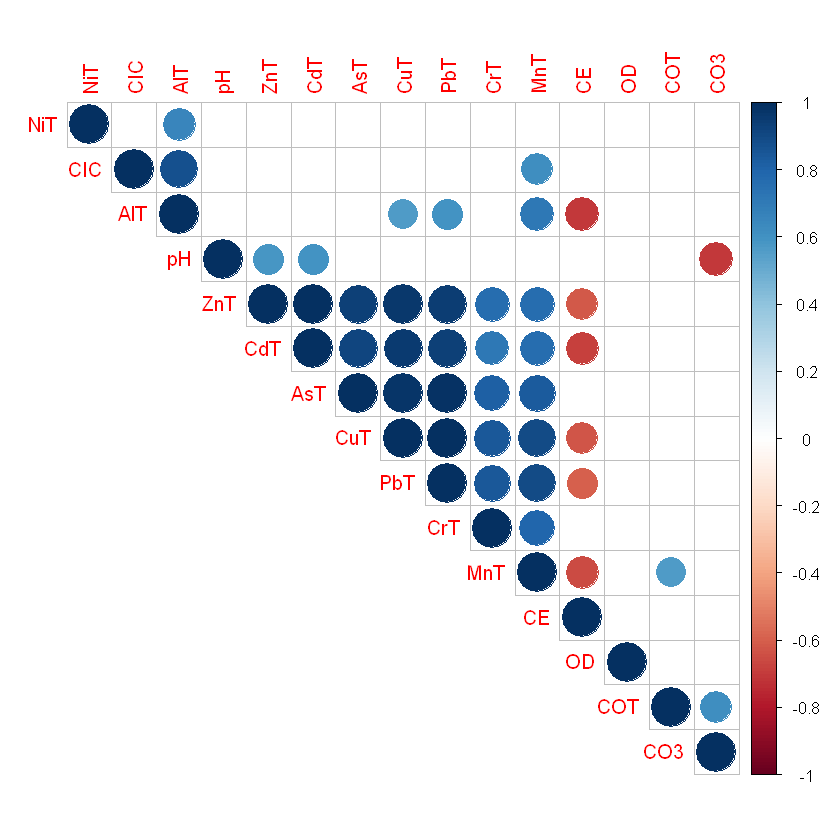

In [427]:
# Insignificant correlations are leaved blank
corrplot(Corr_CT_1$r, type="upper", order="hclust", 
         p.mat = Corr_CT_1$P, sig.level = 0.01, insig = "blank")

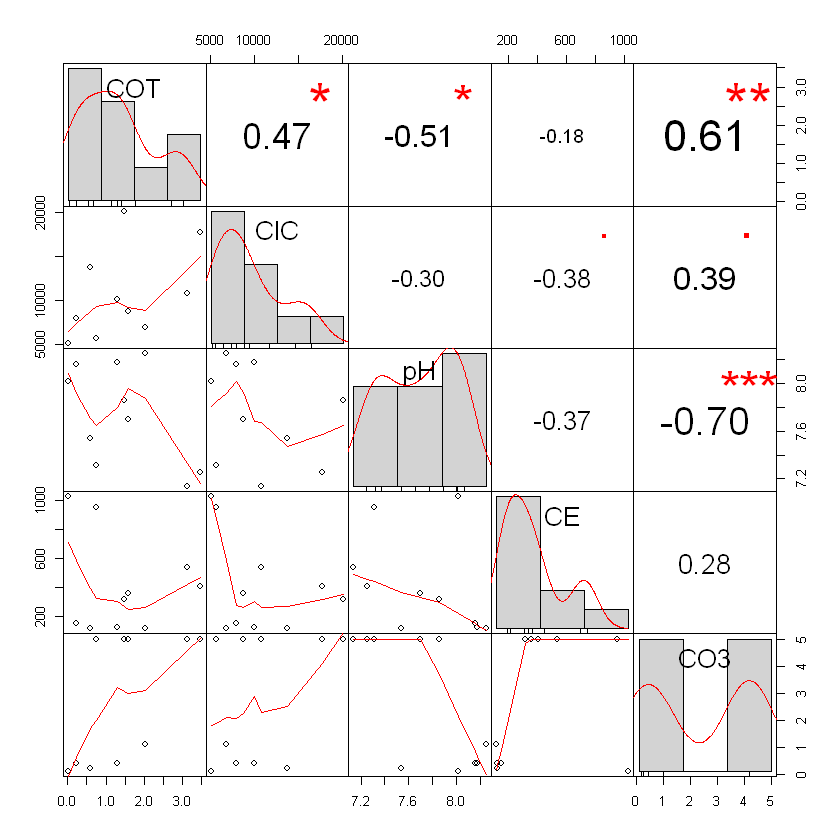

In [423]:
#Grafico con histogramas y  significancia 
#http://www.sthda.com/english/wiki/correlation-matrix-a-quick-start-guide-to-analyze-format-and-visualize-a-correlation-matrix-using-r-software
library("PerformanceAnalytics")
chart.Correlation(Datos_Num_CT[,(0:5)], histogram=TRUE, pch=19)

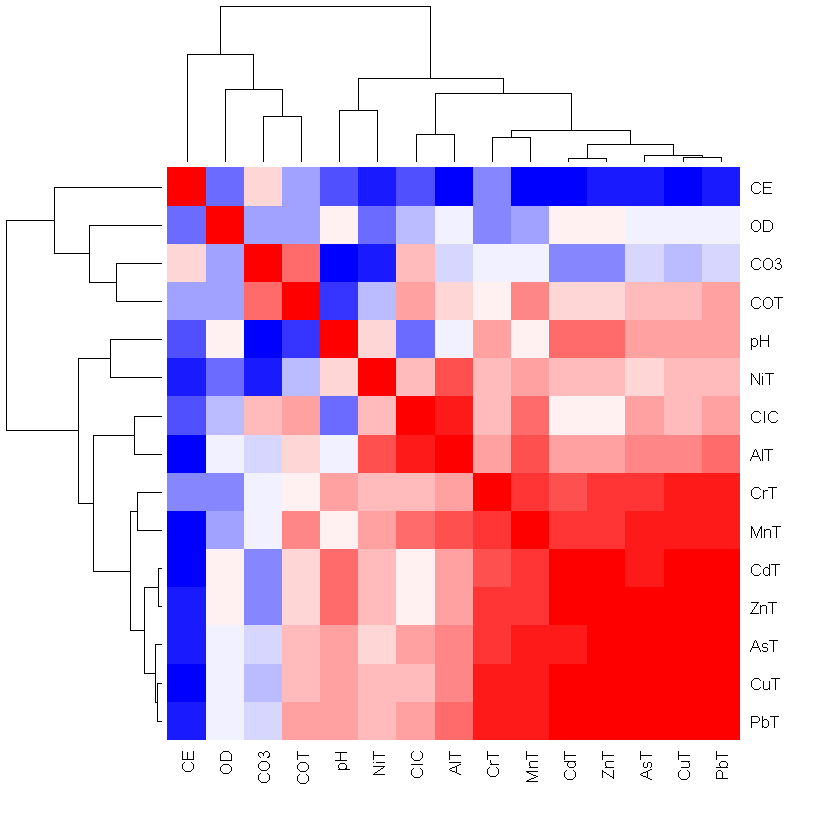

In [31]:
# Heatmap
col<- colorRampPalette(c("blue", "white", "red"))(20)
heatmap(x = Corr_CT, col = col, symm = TRUE)

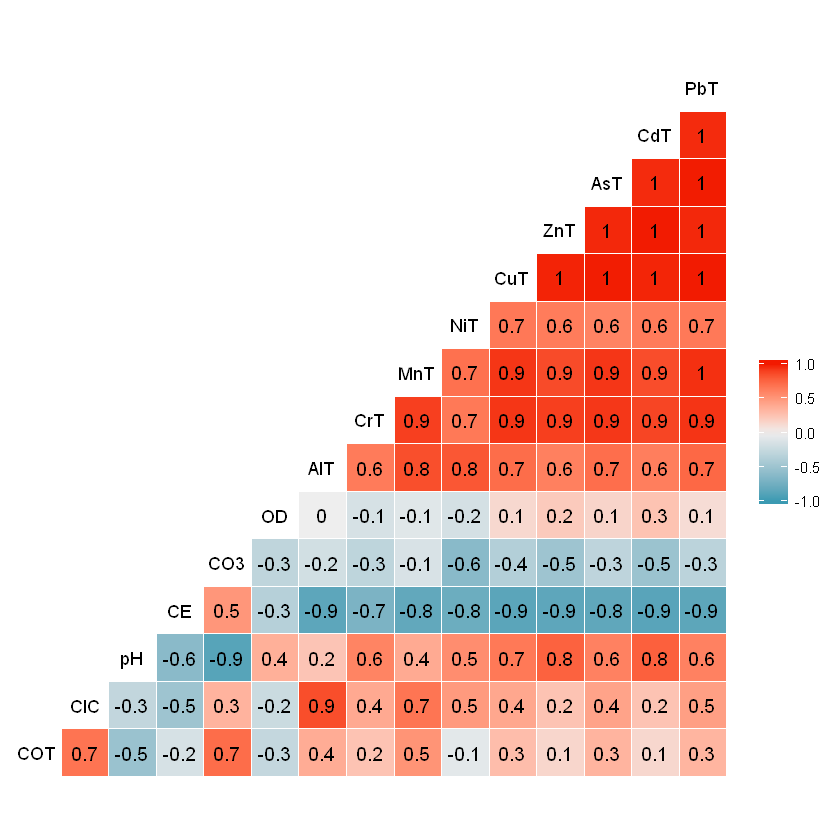

In [32]:
#Heatmap con "TRUE" or "FALSE" to see how the correlation matrix changes
library(GGally)
ggcorr(Corr_CT,label = TRUE,label_alpha = FALSE)

Se procesan los datos con prcomp para hallar PCA
https://www.datacamp.com/community/tutorials/pca-analysis-r#intro

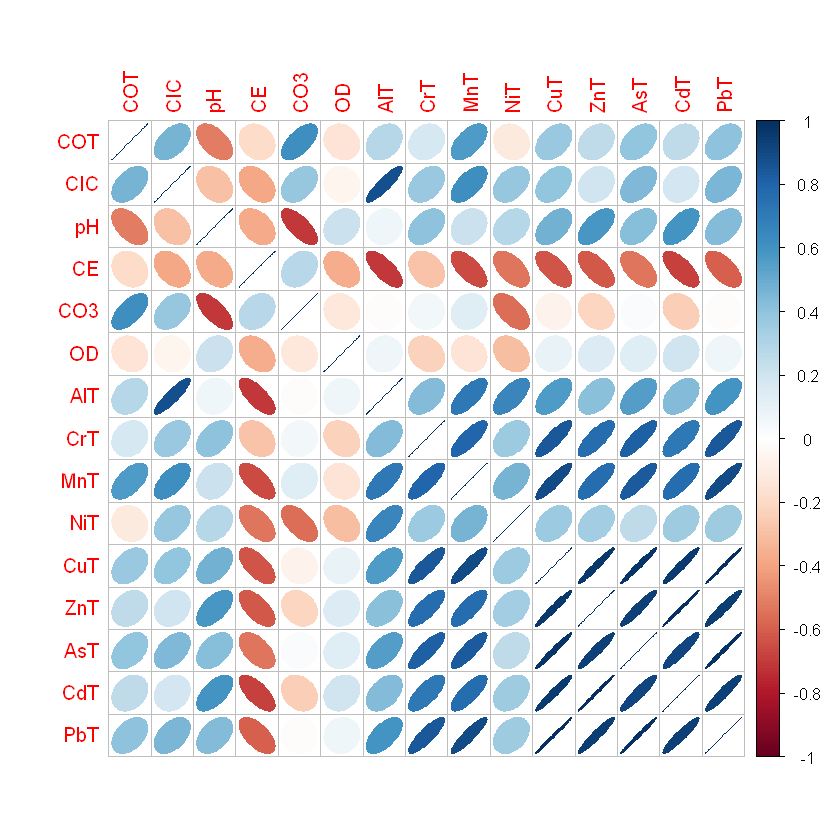

In [33]:
corrplot(cor(Datos_1_Num_CT), method="ellipse")

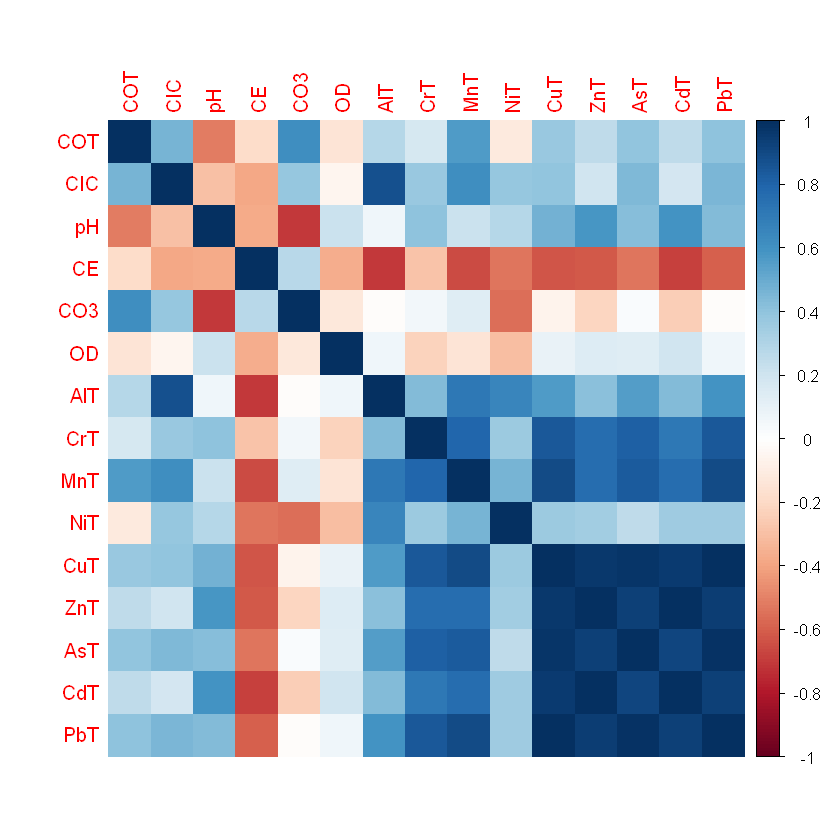

In [34]:
corrplot(cor(Datos_1_Num_CT), method="color")

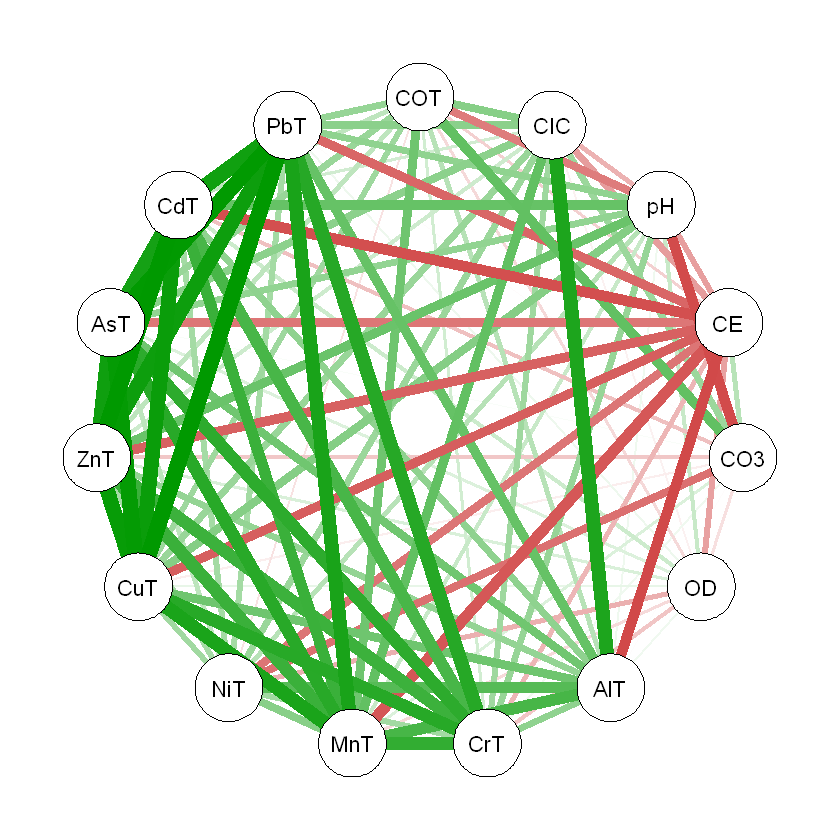

In [51]:
library("qgraph")
qgraph(cor(Datos_1_Num_CT))

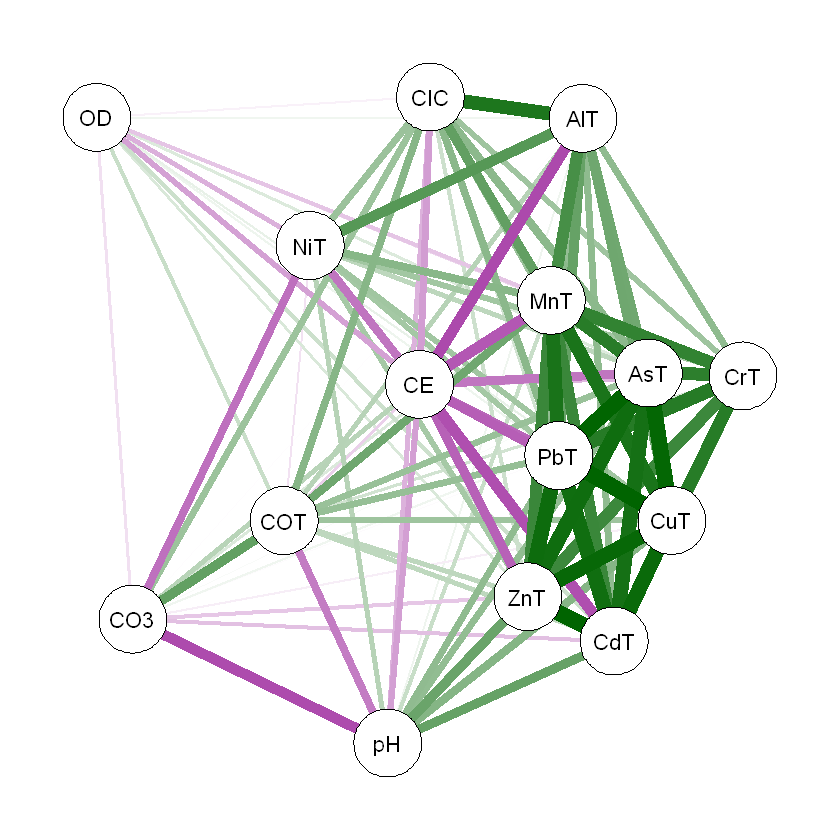

In [52]:
qgraph(cor(Datos_1_Num_CT), layout="spring", posCol="darkgreen", negCol="darkmagenta")

## Principal component analysis

In [124]:
#PCA con princomp
Datos_1_CT_pca<- princomp(Datos_1_Num_CT, cor=T)
Datos_1_CT_pca

Call:
princomp(x = Datos_1_Num_CT, cor = T)

Standard deviations:
      Comp.1       Comp.2       Comp.3       Comp.4       Comp.5       Comp.6 
2.815267e+00 1.691846e+00 1.323719e+00 1.167448e+00 7.887973e-01 4.907749e-01 
      Comp.7       Comp.8       Comp.9      Comp.10      Comp.11      Comp.12 
3.810678e-01 2.717009e-01 1.211144e-01 2.251544e-08 1.385226e-08 1.340124e-08 
     Comp.13      Comp.14      Comp.15 
0.000000e+00 0.000000e+00 0.000000e+00 

 15  variables and  20 observations.

In [125]:
summary(Datos_1_CT_pca)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     2.8152669 1.6918459 1.3237191 1.16744757 0.78879729
Proportion of Variance 0.5283818 0.1908228 0.1168155 0.09086225 0.04148008
Cumulative Proportion  0.5283818 0.7192047 0.8360202 0.92688241 0.96836249
                           Comp.6      Comp.7      Comp.8       Comp.9
Standard deviation     0.49077485 0.381067789 0.271700891 0.1211143657
Proportion of Variance 0.01605733 0.009680844 0.004921425 0.0009779126
Cumulative Proportion  0.98441982 0.994100662 0.999022087 1.0000000000
                            Comp.10      Comp.11      Comp.12 Comp.13 Comp.14
Standard deviation     2.251544e-08 1.385226e-08 1.340124e-08       0       0
Proportion of Variance 3.379634e-17 1.279235e-17 1.197289e-17       0       0
Cumulative Proportion  1.000000e+00 1.000000e+00 1.000000e+00       1       1
                       Comp.15
Standard deviation           0
Proportion of Va

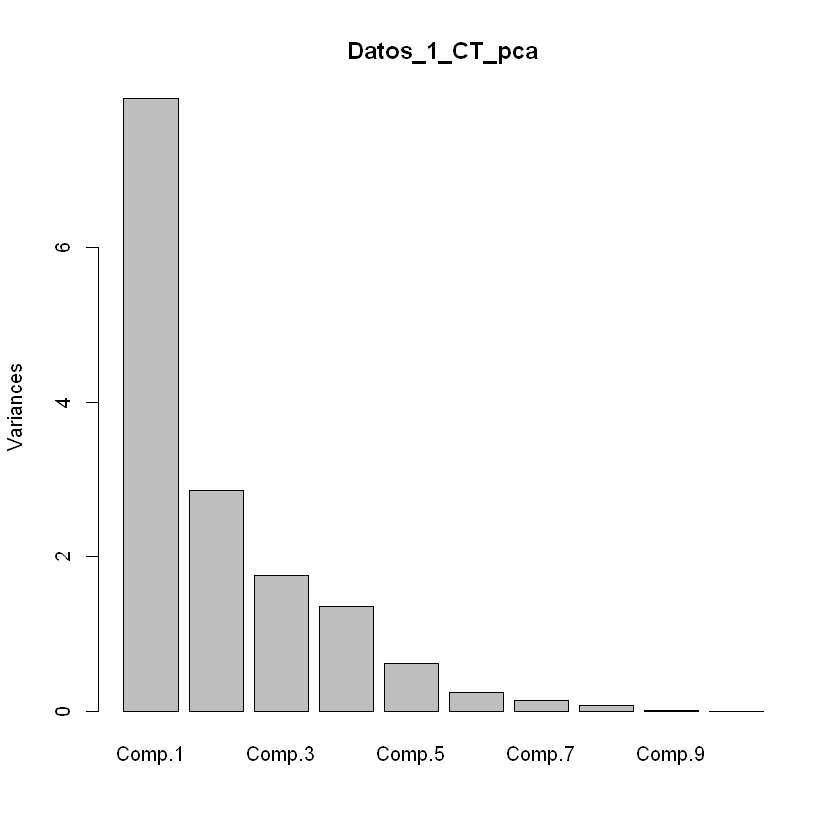

In [126]:
screeplot(Datos_1_CT_pca)

In [127]:
print(loadings(Datos_1_CT_pca),cutoff=0.0)


Loadings:
    Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
COT  0.128  0.456  0.168  0.058  0.558  0.185  0.278  0.344  0.081  0.375 
CIC  0.183  0.374 -0.334  0.144 -0.382  0.192  0.202 -0.132  0.564 -0.165 
pH   0.160 -0.489  0.075 -0.068 -0.188 -0.300  0.600  0.072  0.254  0.353 
CE  -0.257  0.090  0.230 -0.399 -0.320  0.559  0.146  0.176 -0.022  0.122 
CO3 -0.036  0.520  0.269  0.037 -0.228 -0.420 -0.180 -0.301  0.077  0.310 
OD   0.024 -0.169  0.185  0.764 -0.220  0.180 -0.244  0.397  0.077  0.106 
AlT  0.251  0.156 -0.437  0.203 -0.209  0.019  0.216 -0.073 -0.595  0.289 
CrT  0.289  0.022  0.114 -0.362 -0.390 -0.145 -0.392  0.395 -0.071  0.229 
MnT  0.329  0.164 -0.036 -0.091  0.103 -0.362  0.088  0.409  0.043 -0.373 
NiT  0.179 -0.124 -0.585 -0.204  0.171  0.183 -0.346  0.094  0.196  0.274 
CuT  0.348 -0.017  0.144 -0.033  0.008  0.063 -0.041  0.058  0.167 -0.153 
ZnT  0.328 -0.129  0.195 -0.027  0.122  0.170 -0.182 -0.339  0.222  0.024 
AsT  0.336  0.

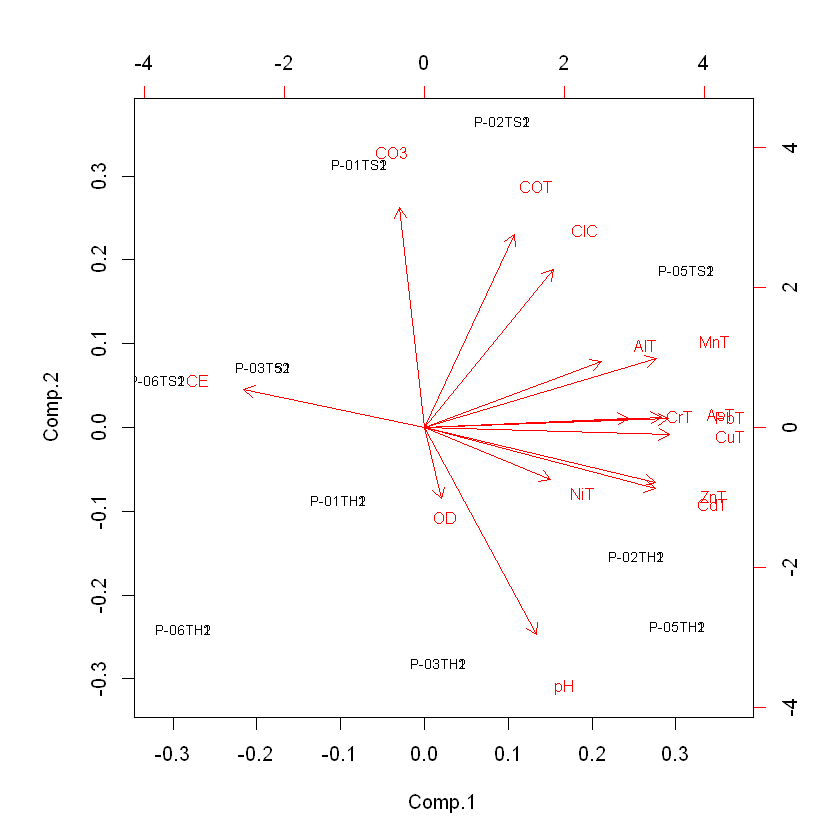

In [128]:
biplot(Datos_1_CT_pca, col=c("black","red"), cex=c(0.7,0.8))

 ## Graficas

In [138]:
Datos_1.pca <- prcomp(Datos_1[,c(1:51)], center = TRUE,scale. = TRUE)
# en vez de Datos_1[,c(1:51)] puede ser Datos_1_Num

In [109]:
summary(Datos_1.pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     5.7378 2.4410 2.15993 1.50044 1.43606 0.96567 0.91949
Proportion of Variance 0.6455 0.1168 0.09148 0.04414 0.04044 0.01828 0.01658
Cumulative Proportion  0.6455 0.7624 0.85385 0.89800 0.93843 0.95672 0.97329
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.75085 0.66633 0.36526 0.26207 0.22061 0.17219 0.16301
Proportion of Variance 0.01105 0.00871 0.00262 0.00135 0.00095 0.00058 0.00052
Cumulative Proportion  0.98435 0.99305 0.99567 0.99702 0.99797 0.99855 0.99907
                          PC15   PC16    PC17    PC18    PC19      PC20
Standard deviation     0.13619 0.1005 0.08785 0.08380 0.06192 7.562e-16
Proportion of Variance 0.00036 0.0002 0.00015 0.00014 0.00008 0.000e+00
Cumulative Proportion  0.99944 0.9996 0.99979 0.99992 1.00000 1.000e+00

El primer componente explica el 64.5 % y el segundo el 11.7%

Se grafican los PCA

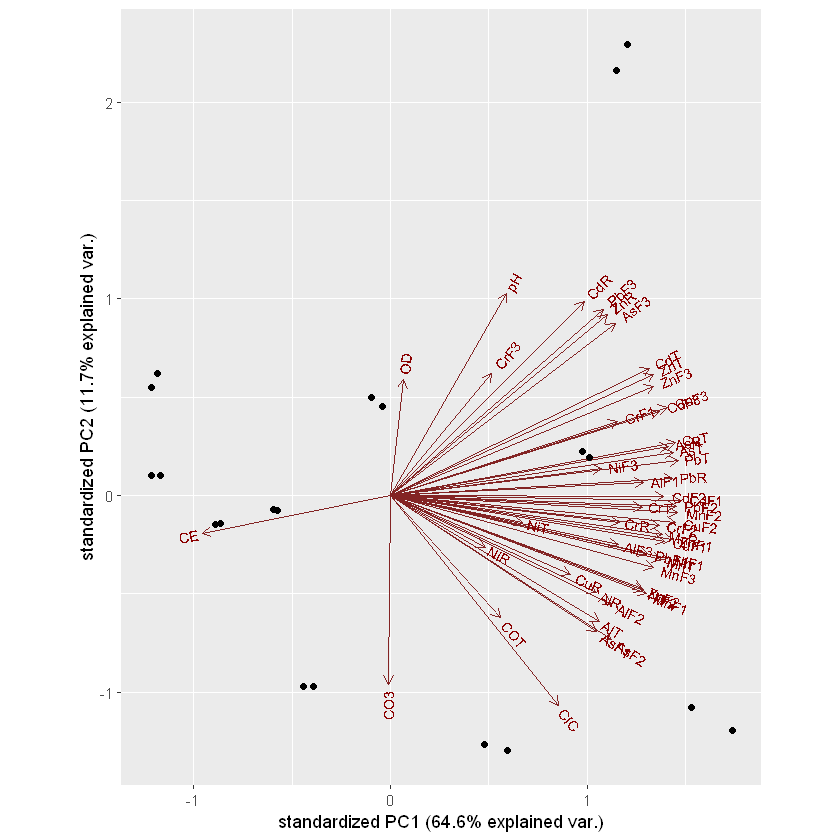

In [110]:
library(ggbiplot)
ggbiplot(Datos_1.pca)

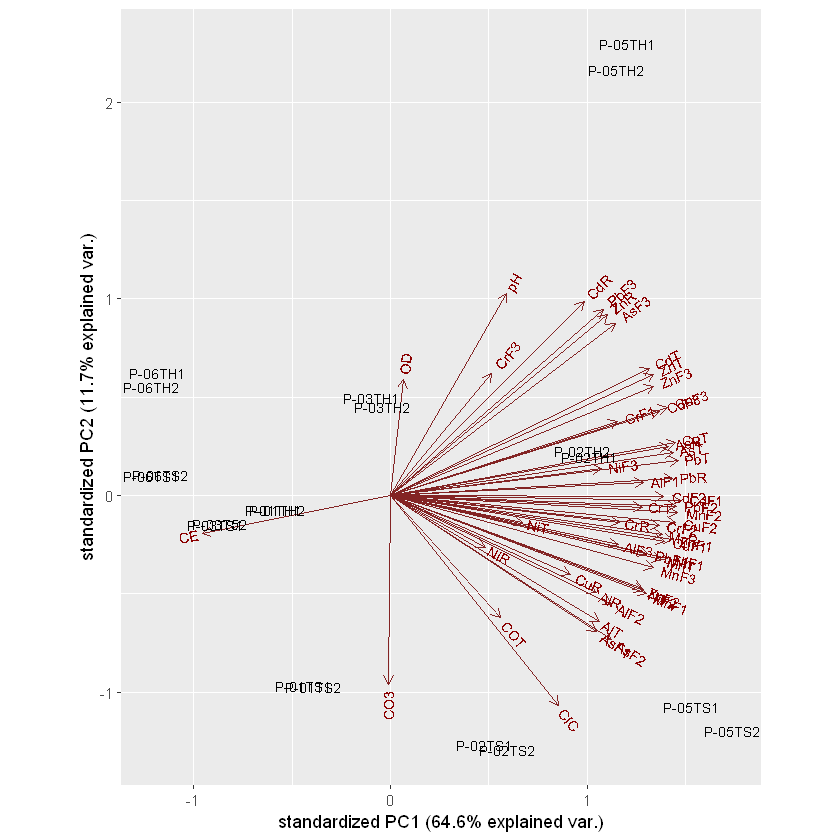

In [111]:
library(ggbiplot)
ggbiplot(Datos_1.pca,labels=rownames(Datos_1))

Se crean caracteres de las columnas con las que se quieren hacer elipses

In [115]:
a<-unlist(Datos_1[52], recursive = TRUE, use.names = TRUE)

In [116]:
b<-unlist(Datos_1[53], recursive = TRUE, use.names = TRUE)

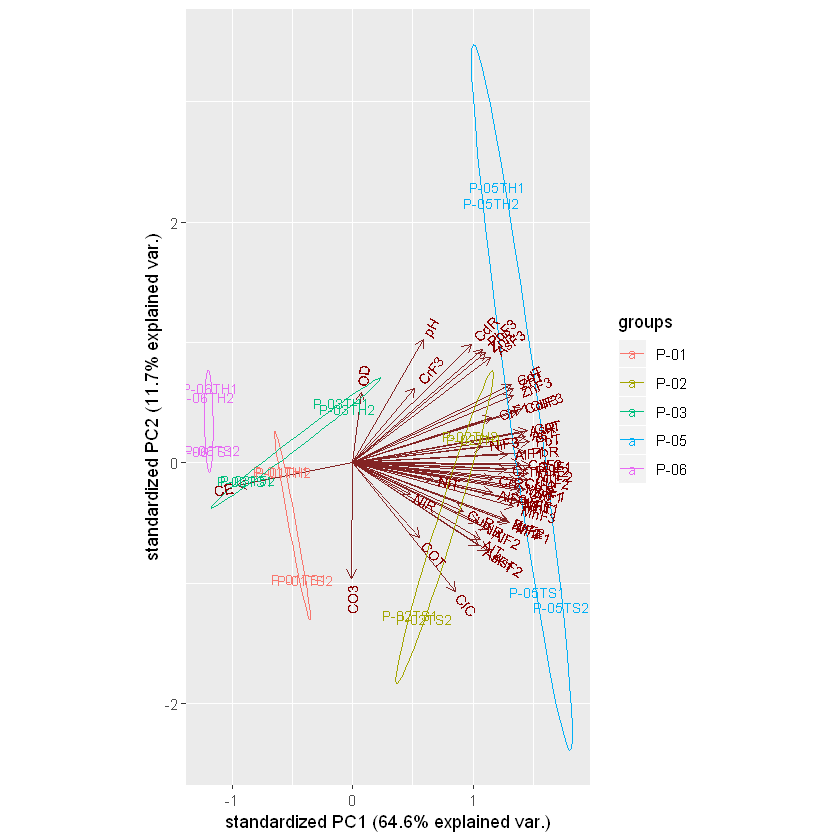

In [118]:
ggbiplot(Datos_1.pca,ellipse=TRUE,  labels=rownames(Datos_1), groups=a)

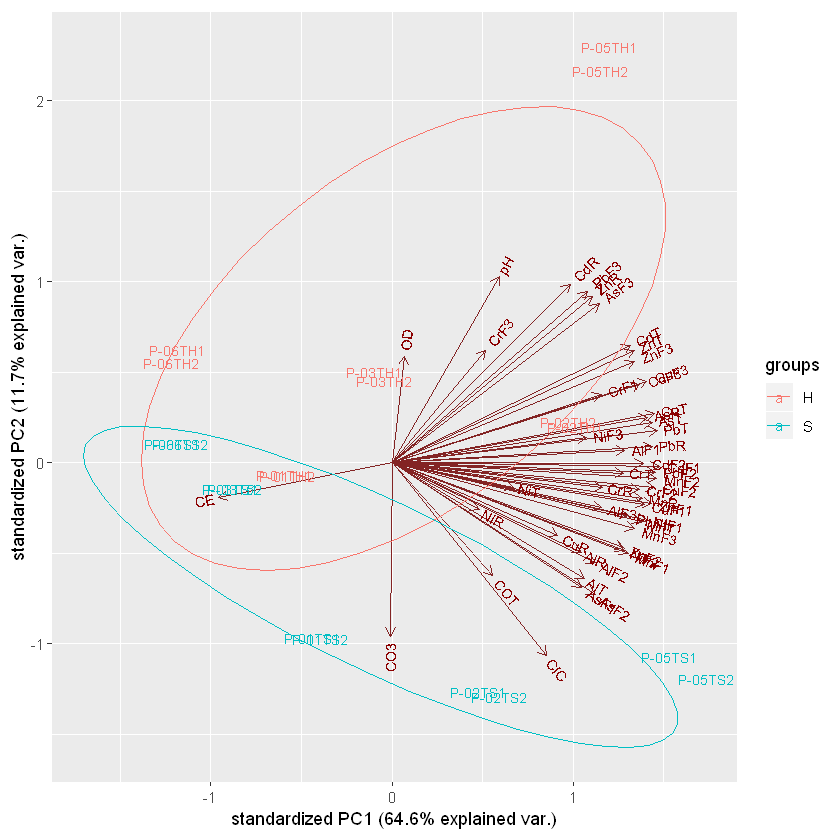

In [119]:
ggbiplot(Datos_1.pca,ellipse=TRUE,  labels=rownames(Datos_1), groups=b)

In [429]:
#PCA con Principal
library("psych")
#Sin rotacion
Datos_CT_pca_unrot<- principal(Datos_Num_CT, nfactors=3, rotate="none")
Datos_CT_pca_unrot

Warning message in cor.smooth(r):
"Matrix was not positive definite, smoothing was done"In factor.stats, I could not find the RMSEA upper bound . Sorry about that
Warning message in principal(Datos_Num_CT, nfactors = 3, rotate = "none"):
"The matrix is not positive semi-definite, scores found from Structure loadings"

Principal Components Analysis
Call: principal(r = Datos_Num_CT, nfactors = 3, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
      PC1   PC2   PC3   h2     u2 com
COT  0.36  0.77  0.22 0.77 0.2263 1.6
CIC  0.51  0.63 -0.44 0.86 0.1396 2.8
pH   0.45 -0.83  0.10 0.90 0.1037 1.6
CE  -0.72  0.15  0.30 0.64 0.3618 1.4
CO3 -0.10  0.88  0.36 0.91 0.0884 1.3
OD   0.07 -0.29  0.25 0.15 0.8540 2.1
AlT  0.71  0.26 -0.58 0.90 0.0959 2.2
CrT  0.81  0.04  0.15 0.69 0.3121 1.1
MnT  0.93  0.28 -0.05 0.94 0.0629 1.2
NiT  0.50 -0.21 -0.77 0.90 0.1014 1.9
CuT  0.98 -0.03  0.19 1.00 0.0034 1.1
ZnT  0.92 -0.22  0.26 0.97 0.0312 1.3
AsT  0.95  0.04  0.26 0.96 0.0355 1.2
CdT  0.92 -0.25  0.23 0.97 0.0335 1.3
PbT  0.98  0.03  0.18 0.99 0.0099 1.1

                       PC1  PC2  PC3
SS loadings           7.93 2.86 1.75
Proportion Var        0.53 0.19 0.12
Cumulative Var        0.53 0.72 0.84
Proportion Explained  0.63 0.23 0.14
Cumulative Proportion 0.63 0.86 1.00

Mean

In [135]:
summary(Datos_1_CT_pca_unrot)


Factor analysis with Call: principal(r = Datos_1_Num_CT, nfactors = 3, rotate = "none")

Test of the hypothesis that 3 factors are sufficient.
The degrees of freedom for the model is 63  and the objective function was  119.89 
The number of observations was  20  with Chi Square =  1338.82  with prob <  2.1e-238 

The root mean square of the residuals (RMSA) is  0.08 


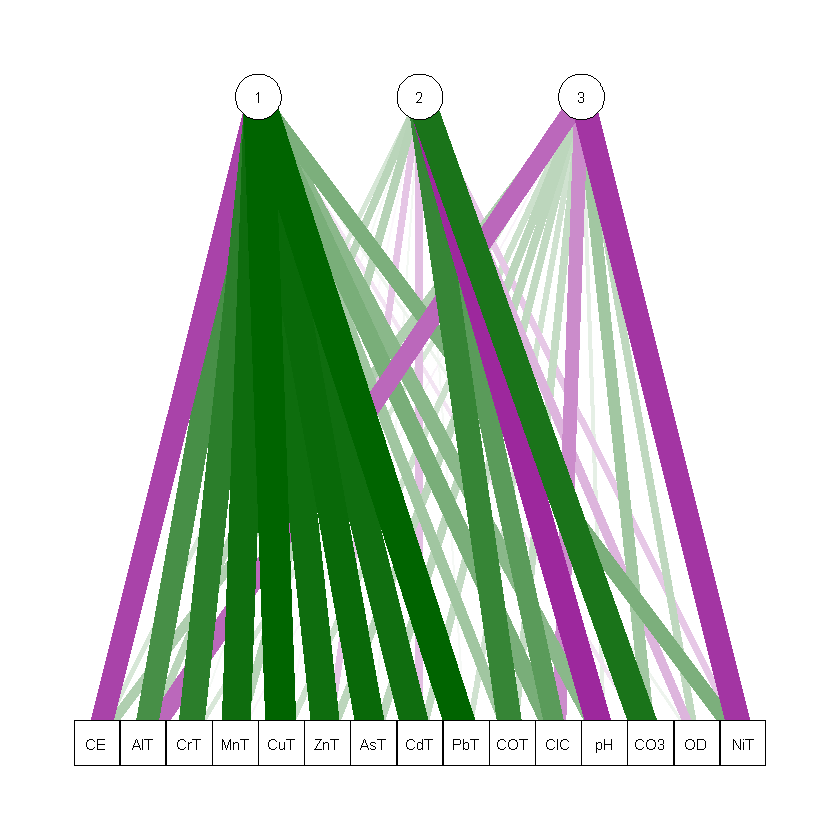

In [432]:
qg_pca_unrot<-qgraph(loadings(Datos_1_CT_pca_unrot), posCol="darkgreen", layout="spring", negCol="darkmagenta", edge.width=2)

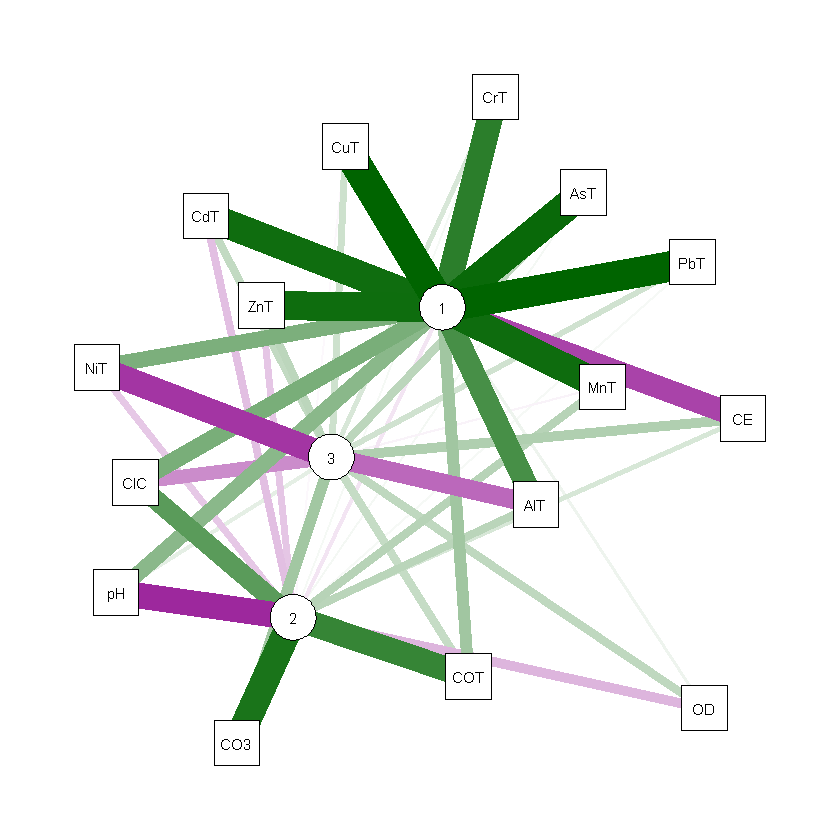

In [433]:
qgraph(qg_pca_unrot, layout="spring", posCol="darkgreen", negCol="darkmagenta", edge.width=2)

In [434]:
#Con rotacion
Datos_CT_pca_rot<- principal(Datos_Num_CT, nfactors=3, rotate="varimax")
Datos_CT_pca_rot

Warning message in cor.smooth(r):
"Matrix was not positive definite, smoothing was done"In factor.stats, I could not find the RMSEA upper bound . Sorry about that
Warning message in principal(Datos_Num_CT, nfactors = 3, rotate = "varimax"):
"The matrix is not positive semi-definite, scores found from Structure loadings"

Principal Components Analysis
Call: principal(r = Datos_Num_CT, nfactors = 3, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
      RC1   RC2   RC3   h2     u2 com
COT  0.36  0.79  0.11 0.77 0.2263 1.4
CIC  0.26  0.50  0.74 0.86 0.1396 2.1
pH   0.51 -0.79 -0.10 0.90 0.1037 1.8
CE  -0.56  0.24 -0.51 0.64 0.3618 2.3
CO3 -0.02  0.94 -0.16 0.91 0.0884 1.1
OD   0.17 -0.22 -0.26 0.15 0.8540 2.7
AlT  0.42  0.10  0.85 0.90 0.0959 1.5
CrT  0.81  0.05  0.19 0.69 0.3121 1.1
MnT  0.82  0.24  0.46 0.94 0.0629 1.8
NiT  0.19 -0.40  0.84 0.90 0.1014 1.5
CuT  0.98 -0.01  0.20 1.00 0.0034 1.1
ZnT  0.97 -0.17  0.07 0.97 0.0312 1.1
AsT  0.97  0.08  0.14 0.96 0.0355 1.1
CdT  0.96 -0.20  0.09 0.97 0.0335 1.1
PbT  0.97  0.05  0.22 0.99 0.0099 1.1

                       RC1  RC2  RC3
SS loadings           7.02 2.80 2.71
Proportion Var        0.47 0.19 0.18
Cumulative Var        0.47 0.66 0.84
Proportion Explained  0.56 0.22 0.22
Cumulative Proportion 0.56 0.78 1.00

M

In [435]:
summary(Datos_CT_pca_rot)


Factor analysis with Call: principal(r = Datos_Num_CT, nfactors = 3, rotate = "varimax")

Test of the hypothesis that 3 factors are sufficient.
The degrees of freedom for the model is 63  and the objective function was  119.89 
The number of observations was  20  with Chi Square =  1338.82  with prob <  2.1e-238 

The root mean square of the residuals (RMSA) is  0.08 


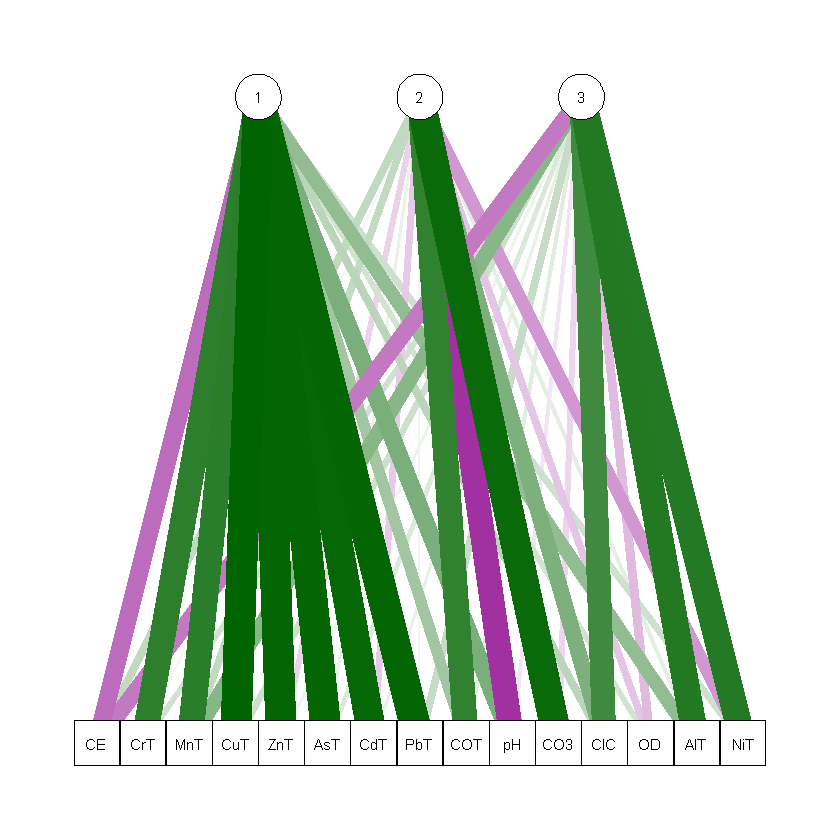

In [436]:
qg_pca_rot <- qgraph(loadings(Datos_CT_pca_rot), layout="spring", posCol="darkgreen", negCol="darkmagenta",edge.width=2)

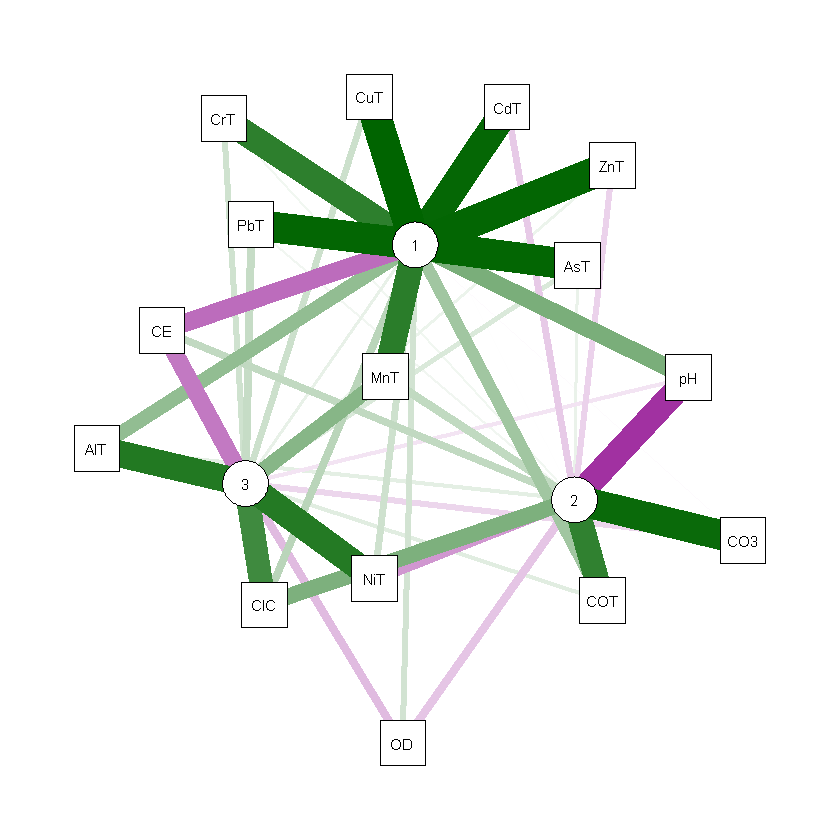

In [158]:
qgraph(qg_pca_rot, layout="spring", posCol="darkgreen", negCol="darkmagenta",edge.width=2)

 ### Heatmaps

In [166]:
# scale data to mean=0, sd=1 and convert to matrix
Datos_scaled <- as.matrix(scale(Datos_1_Num))

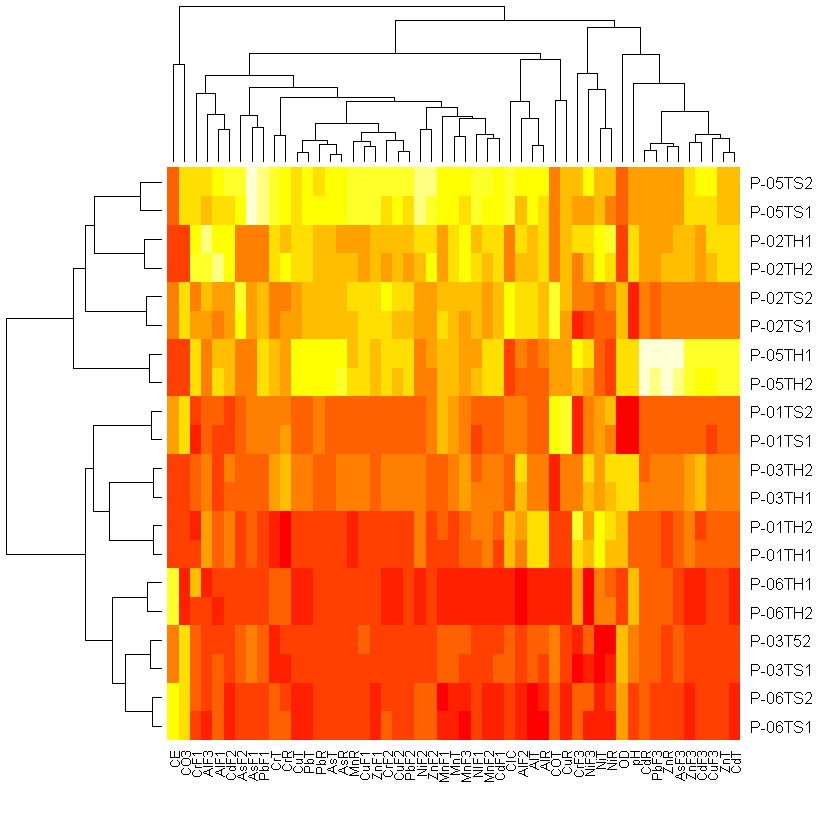

In [167]:
# create heatmap and don't reorder columns
heatmap(Datos_scaled, Colv=F, scale='none')

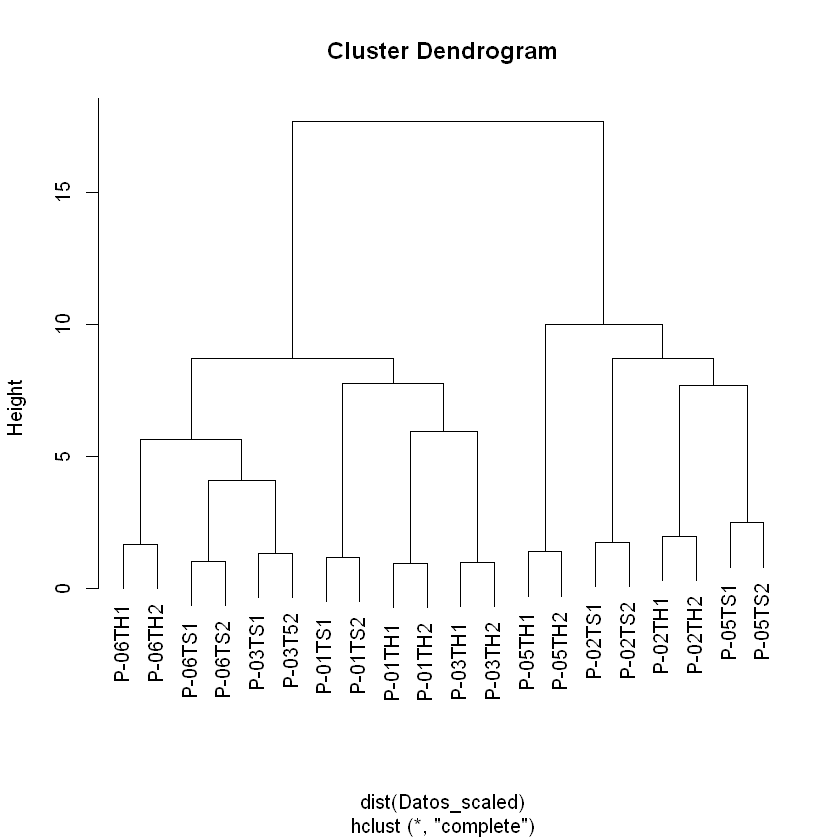

In [168]:
# cluster rows
hc.rows <- hclust(dist(Datos_scaled))
plot(hc.rows)

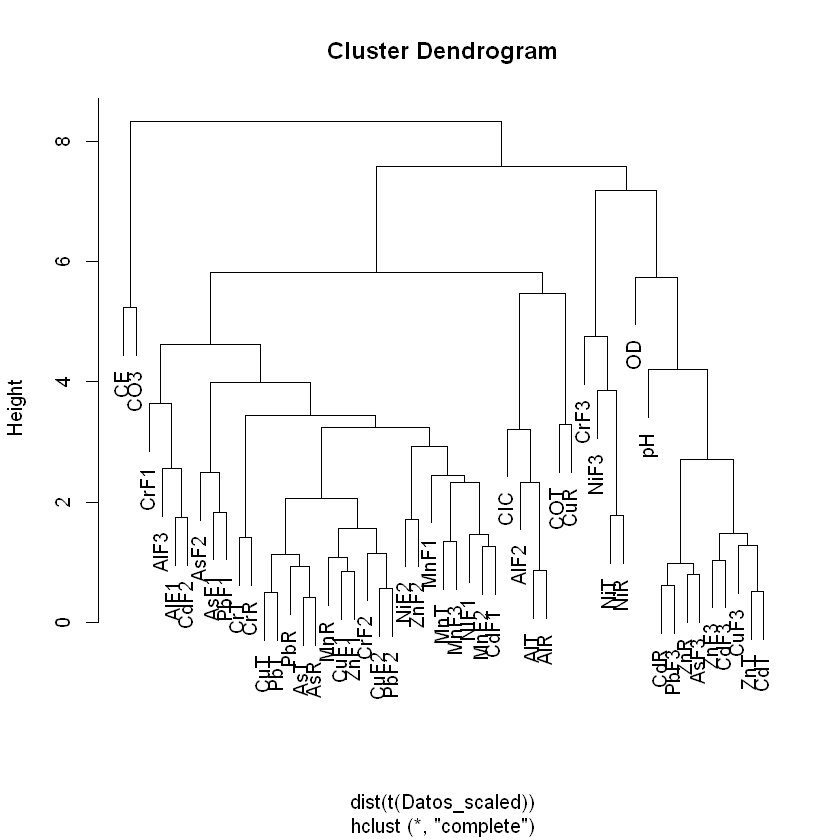

In [171]:
# transpose the matrix and cluster columns
hc.cols <- hclust(dist(t(Datos_scaled)))
plot(hc.cols)

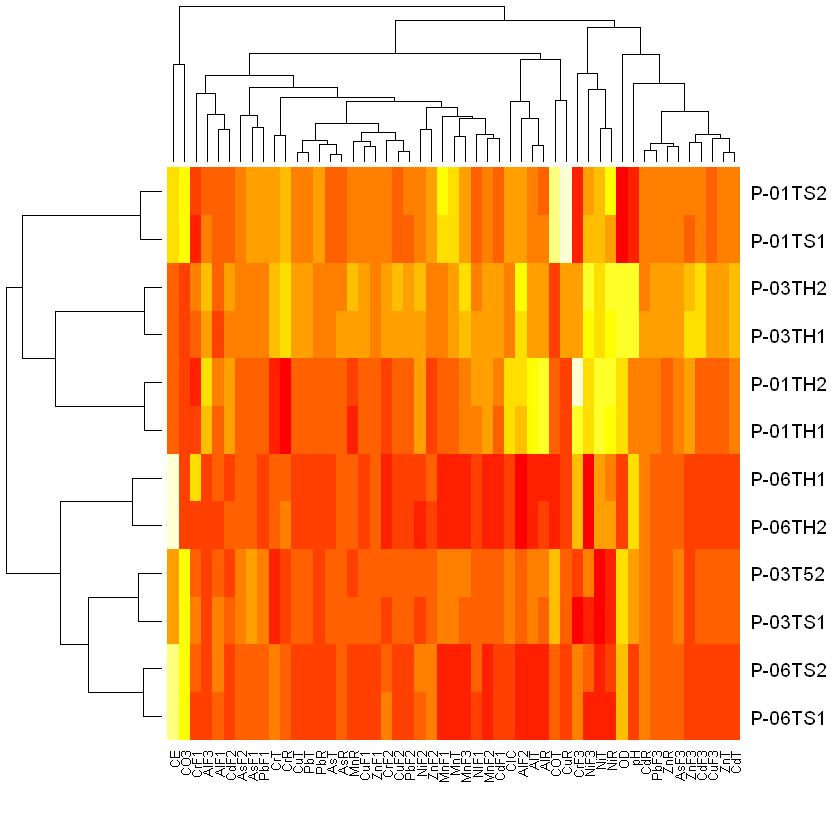

In [172]:
# draw heatmap for first cluster
heatmap(Datos_scaled[cutree(hc.rows,k=2)==1,], Colv=as.dendrogram(hc.cols), scale='none')

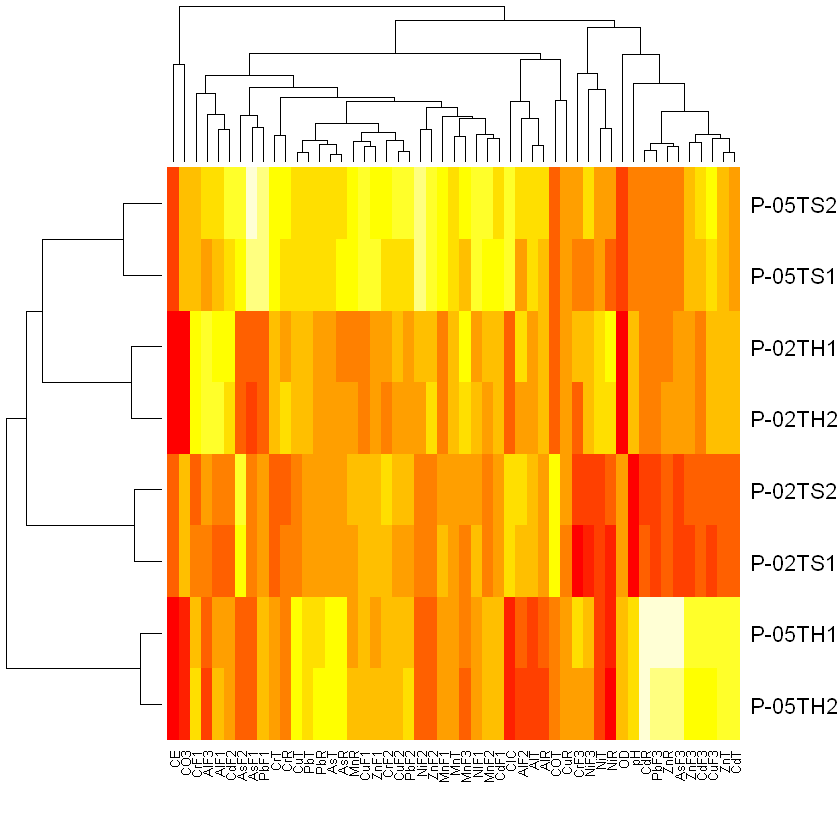

In [173]:
# draw heatmap for second cluster
heatmap(Datos_scaled[cutree(hc.rows,k=2)==2,], Colv=as.dendrogram(hc.cols), scale='none')

In [334]:
library("FactoMineR")
library("factoextra")
Dat.pca <- PCA(Datos_1_Num_CT, graph = FALSE)
print(Dat.pca)

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 20 individuals, described by 15 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

In [185]:
eig.val <- get_eigenvalue(Dat.pca)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,7.925728e+00,5.283818e+01,52.83818
Dim.2,2.862342e+00,1.908228e+01,71.92047
Dim.3,1.752232e+00,1.168155e+01,83.60202
Dim.4,1.362934e+00,9.086225e+00,92.68824
Dim.5,6.222012e-01,4.148008e+00,96.83625
Dim.6,2.408600e-01,1.605733e+00,98.44198
Dim.7,1.452127e-01,9.680844e-01,99.41007
Dim.8,7.382137e-02,4.921425e-01,99.90221
Dim.9,1.466869e-02,9.779126e-02,100.00000
Dim.10,3.337424e-30,2.224949e-29,100.00000


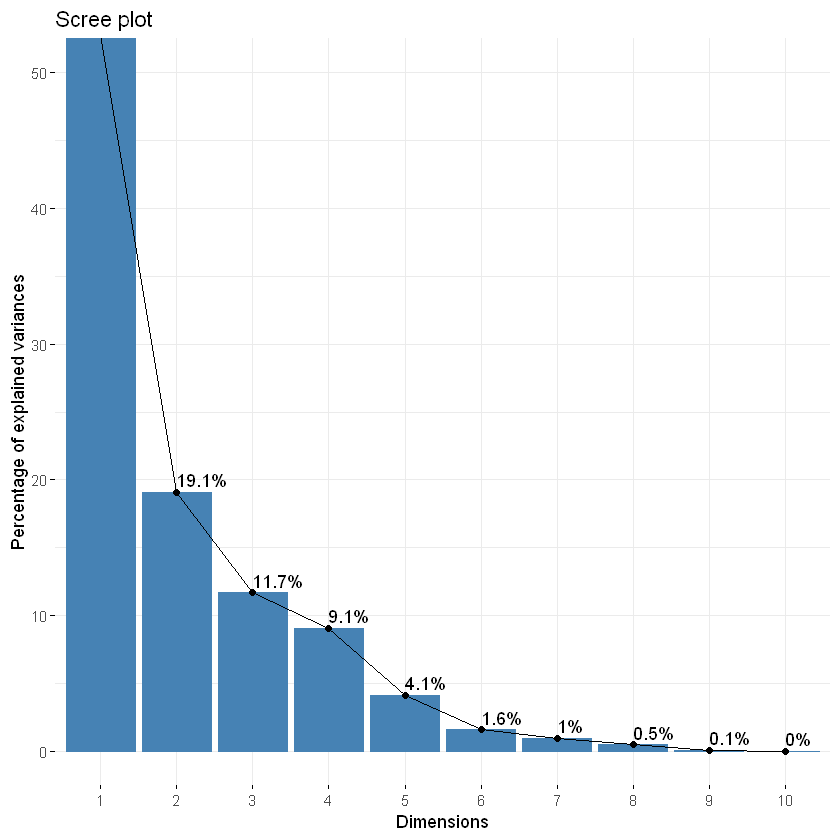

In [186]:
fviz_eig(Dat.pca, addlabels = TRUE, ylim = c(0, 50))

In [197]:
var <- get_pca_var(Dat.pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

In [198]:
# Coordinates
head(var$coord)
# Cos2: quality on the factore map
head(var$cos2)
# Contributions to the principal components
head(var$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
COT,0.35972604,0.7713411,0.22213998,0.06729447,-0.4398523
CIC,0.51451560,0.6325281,-0.44223026,0.16776013,0.3011532
pH,0.44913244,-0.8275272,0.09884294,-0.07969875,0.1481565
CE,-0.72256383,0.1525894,0.30463686,-0.46605659,0.2527169
CO3,-0.10106375,0.8799140,0.35656424,0.04349506,0.1801765
OD,0.06668365,-0.2853125,0.24534861,0.89200539,0.1737131


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
COT,0.129402824,0.59496705,0.049346171,0.004528546,0.19347005
CIC,0.264726307,0.40009180,0.195567601,0.028143461,0.09069326
pH,0.201719946,0.68480121,0.009769926,0.006351890,0.02195034
CE,0.522098492,0.02328352,0.092803614,0.217208750,0.06386582
CO3,0.010213881,0.77424874,0.127138054,0.001891820,0.03246356
OD,0.004446709,0.08140322,0.060195940,0.795673614,0.03017624


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
COT,1.63269329,20.786019,2.8161889,0.3322646,31.094453
CIC,3.34008836,13.977776,11.1610548,2.0649176,14.576195
pH,2.54512839,23.924504,0.5575703,0.4660454,3.527852
CE,6.58738874,0.813443,5.2963078,15.9368523,10.264498
CO3,0.12886994,27.049480,7.2557764,0.1388050,5.217534
OD,0.05610475,2.843937,3.4353859,58.3794752,4.849918


In [199]:
# Coordinates of variables
head(var$coord, 4)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
COT,0.3597260,0.7713411,0.22213998,0.06729447,-0.4398523
CIC,0.5145156,0.6325281,-0.44223026,0.16776013,0.3011532
pH,0.4491324,-0.8275272,0.09884294,-0.07969875,0.1481565
CE,-0.7225638,0.1525894,0.30463686,-0.46605659,0.2527169


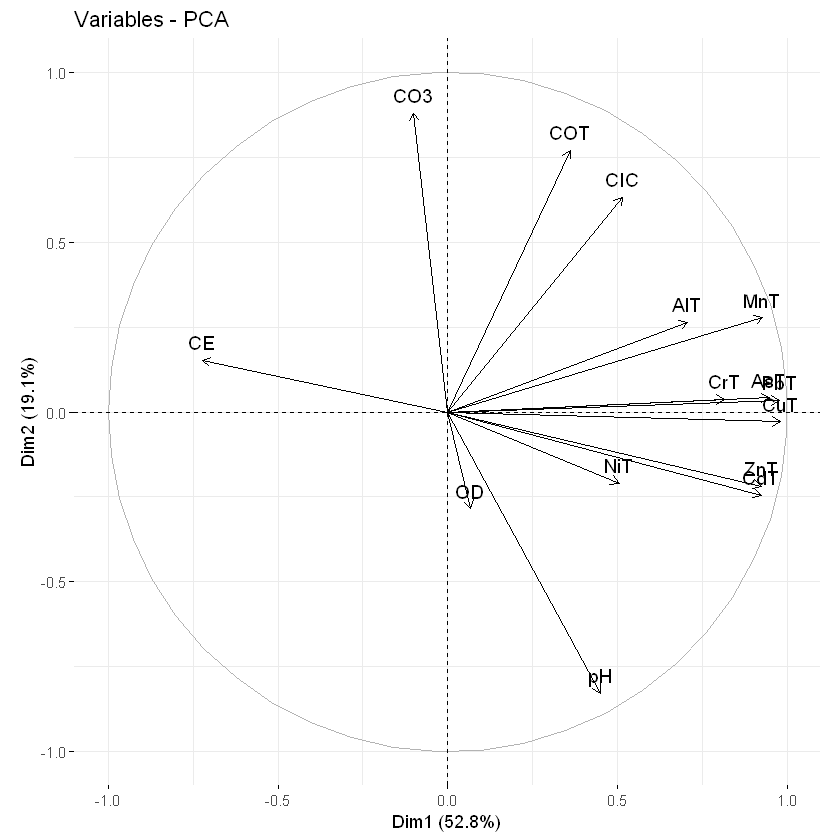

In [200]:
fviz_pca_var(Dat.pca, col.var = "black")

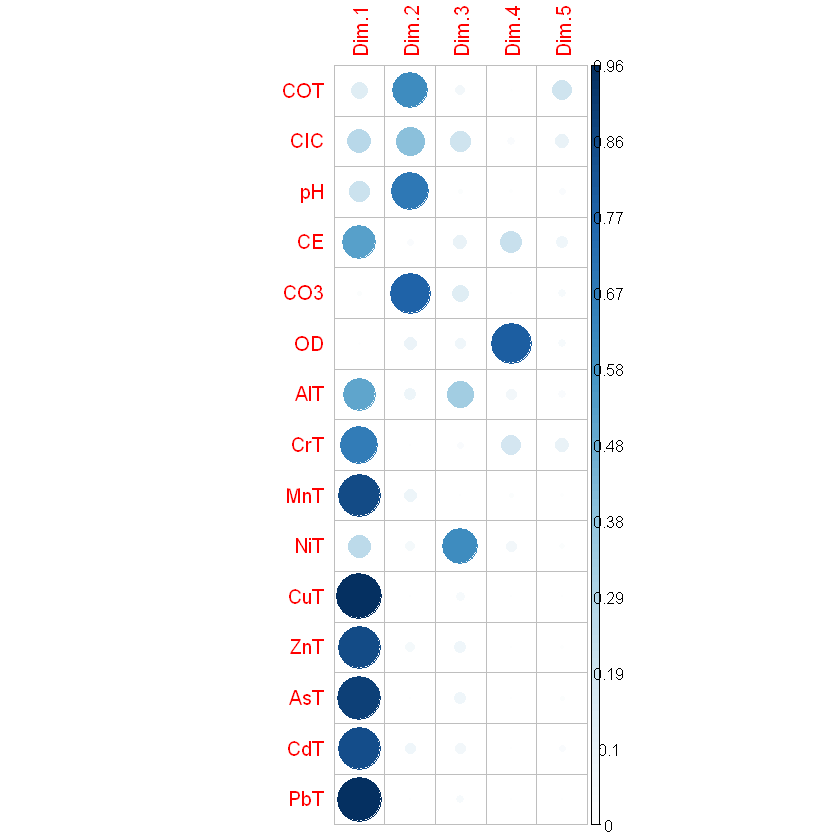

In [201]:
library("corrplot")
corrplot(var$cos2, is.corr=FALSE)

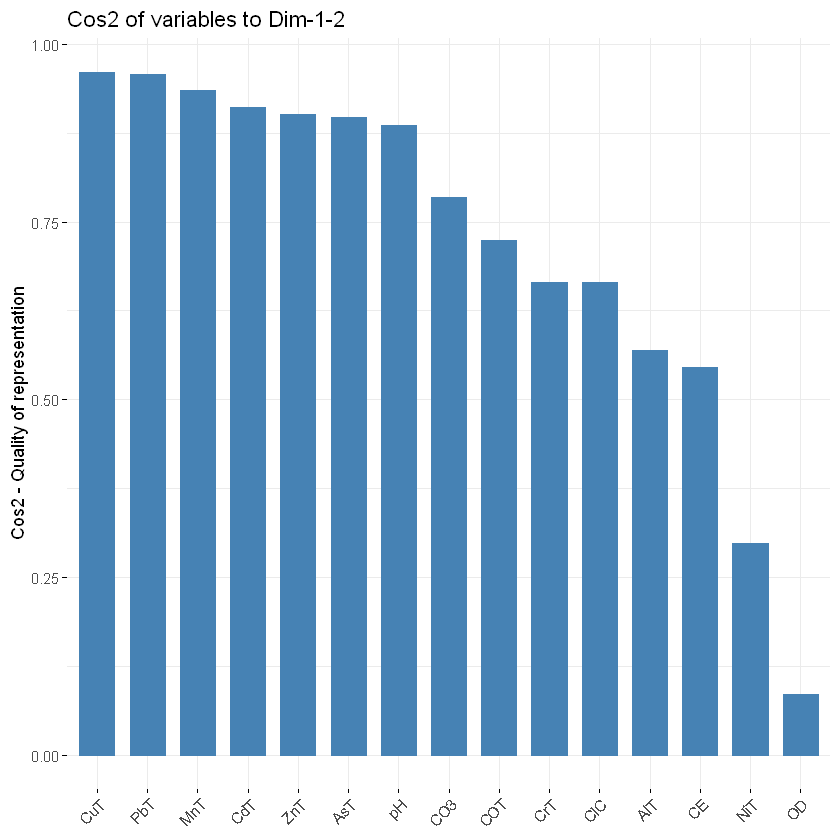

In [202]:
# Total cos2 of variables on Dim.1 and Dim.2
fviz_cos2(Dat.pca, choice = "var", axes = 1:2)

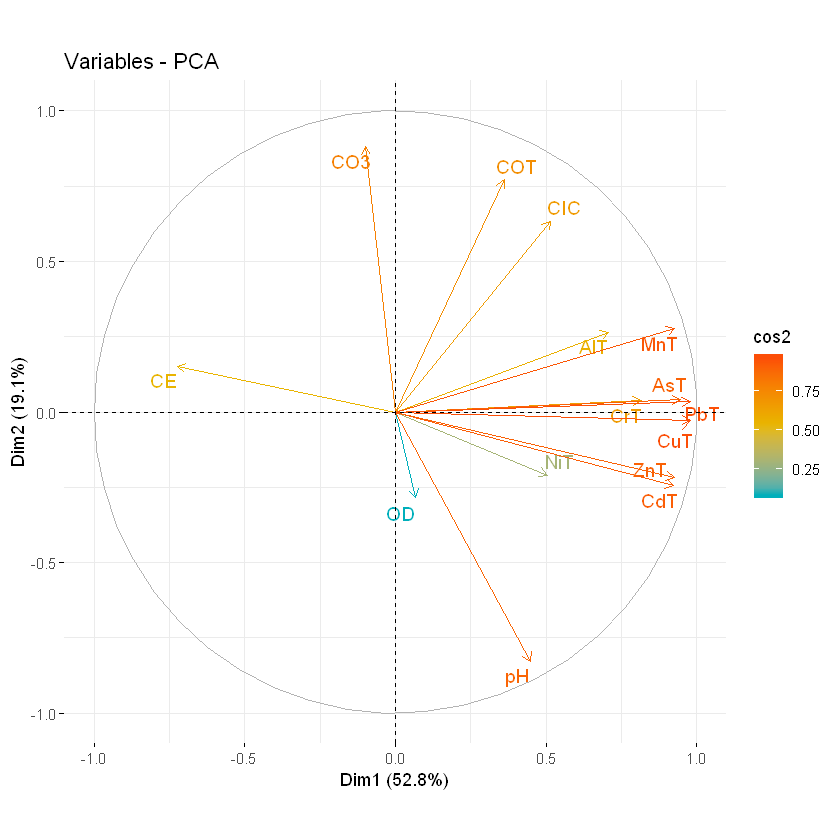

In [203]:
# Color by cos2 values: quality on the factor map
fviz_pca_var(Dat.pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE # Avoid text overlapping
             )

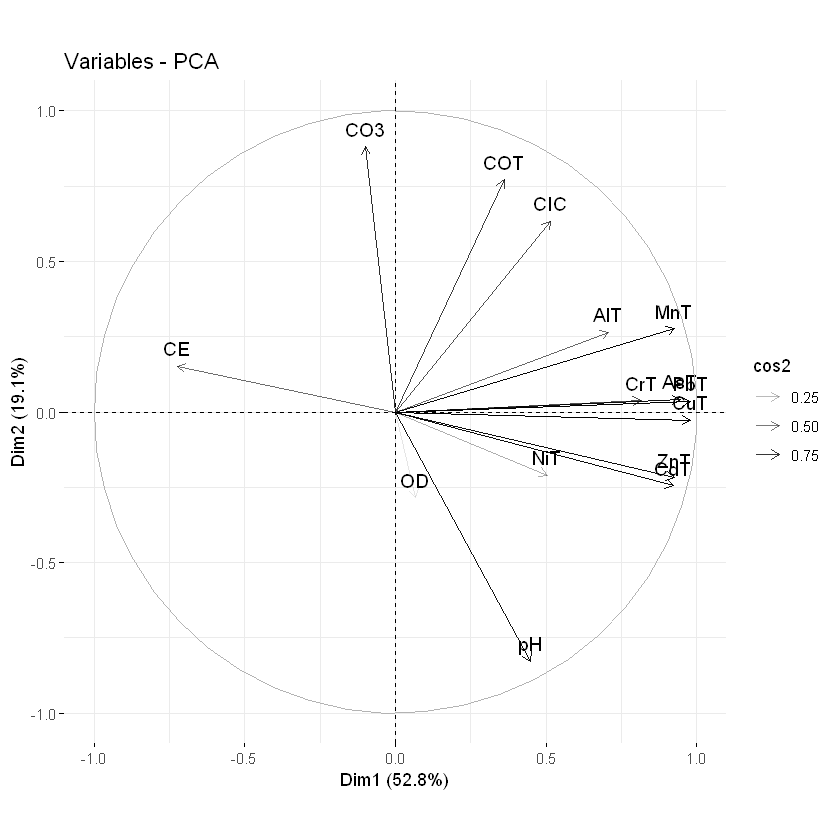

In [204]:
# Change the transparency by cos2 values
fviz_pca_var(Dat.pca, alpha.var = "cos2")

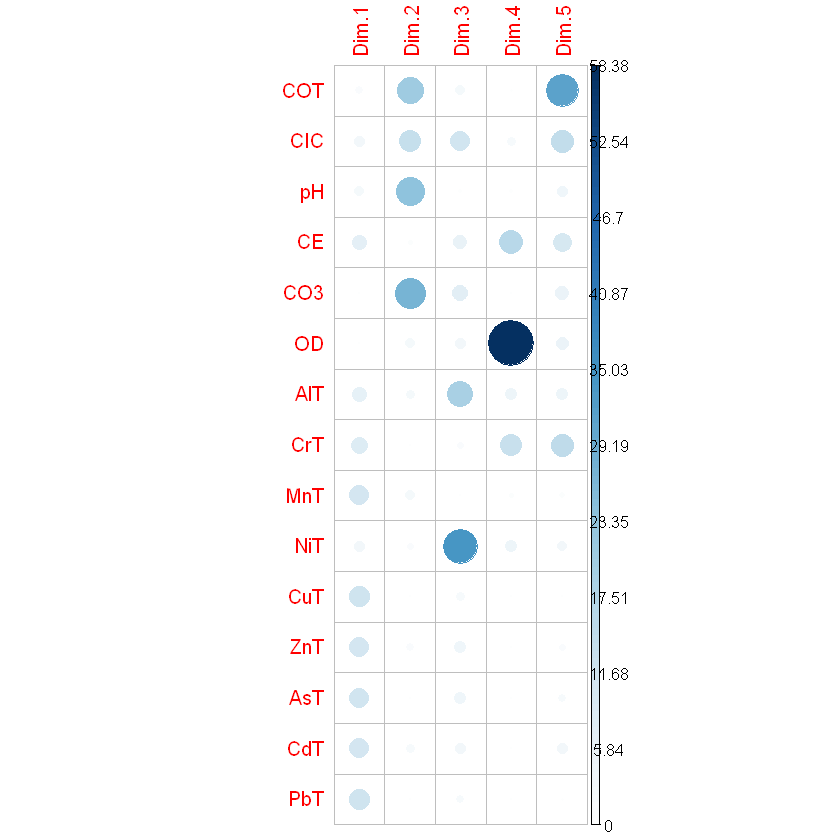

In [205]:
library("corrplot")
corrplot(var$contrib, is.corr=FALSE)  

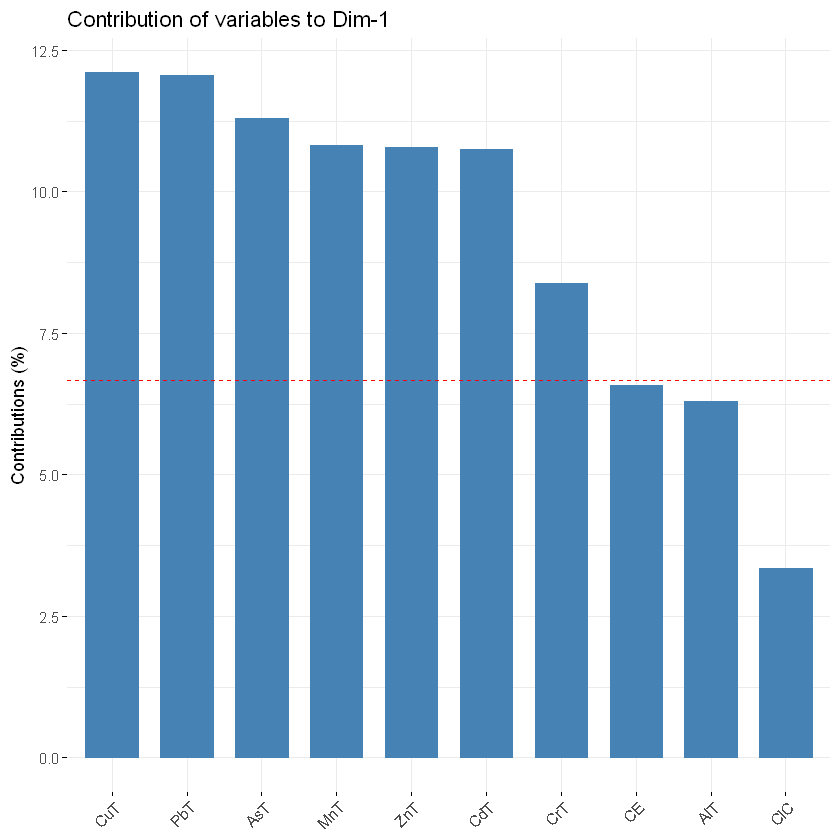

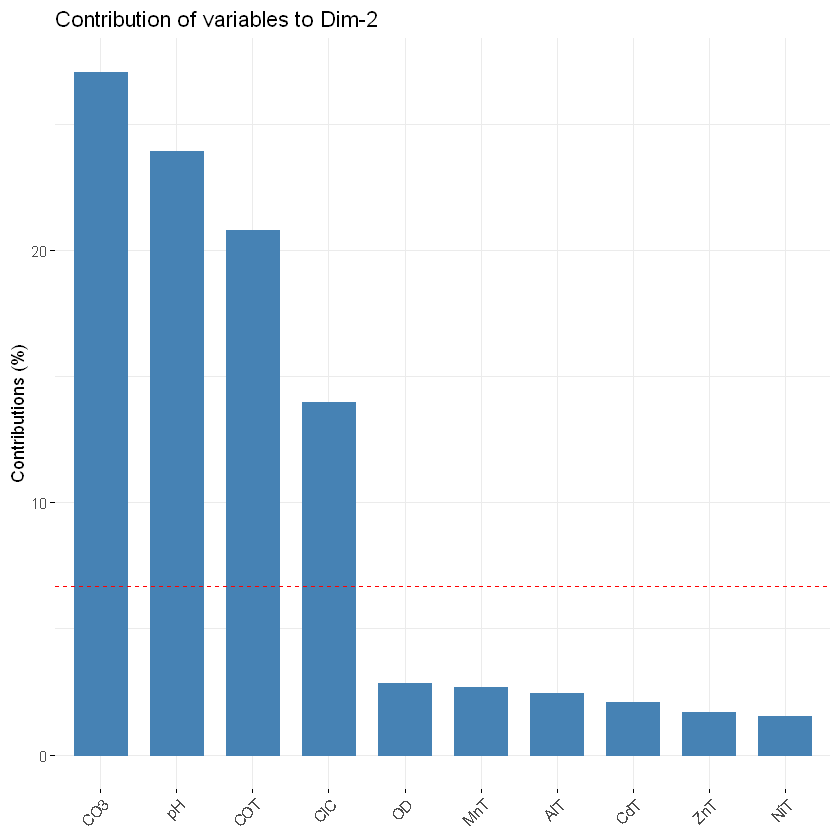

In [206]:
# Contributions of variables to PC1
fviz_contrib(Dat.pca, choice = "var", axes = 1, top = 10)
# Contributions of variables to PC2
fviz_contrib(Dat.pca, choice = "var", axes = 2, top = 10)

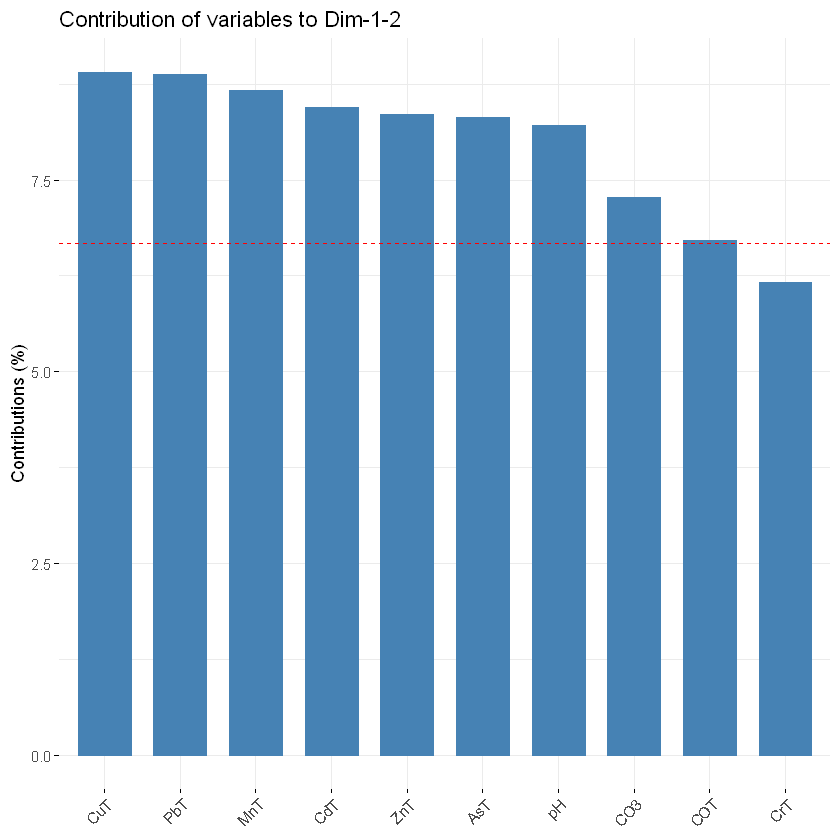

In [208]:
fviz_contrib(Dat.pca, choice = "var", axes = 1:2, top = 10)


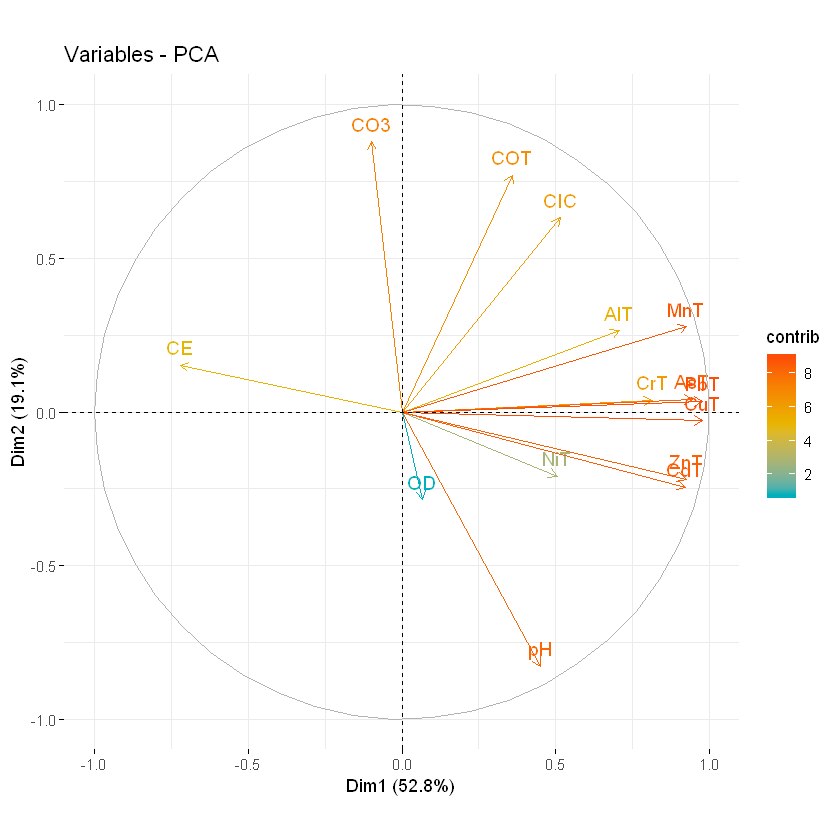

In [209]:
fviz_pca_var(Dat.pca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
             )

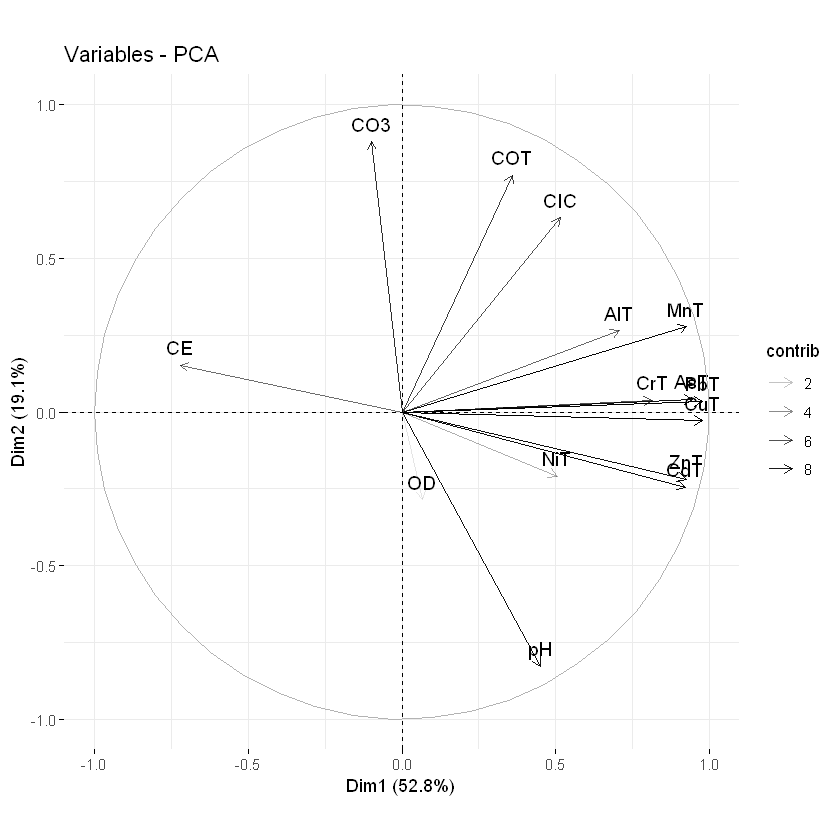

In [210]:
# Change the transparency by contrib values
fviz_pca_var(Dat.pca, alpha.var = "contrib")

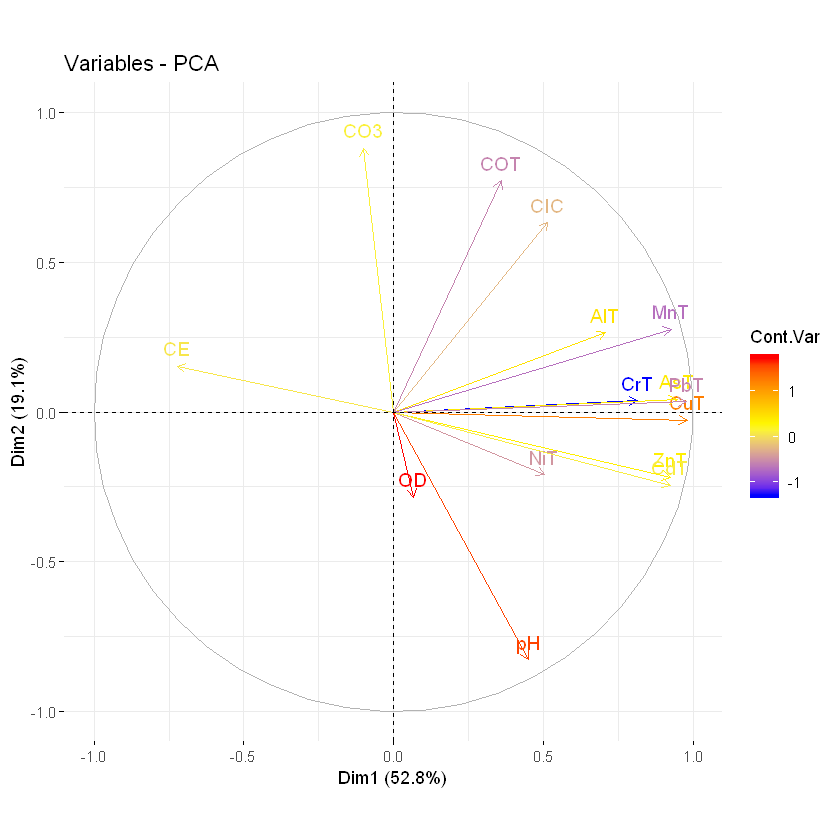

In [214]:
# Create a random continuous variable of length 10
set.seed(123)
my.cont.var <- rnorm(15)
# Color variables by the continuous variable
fviz_pca_var(Dat.pca, col.var = my.cont.var,
             gradient.cols = c("blue", "yellow", "red"),
             legend.title = "Cont.Var")

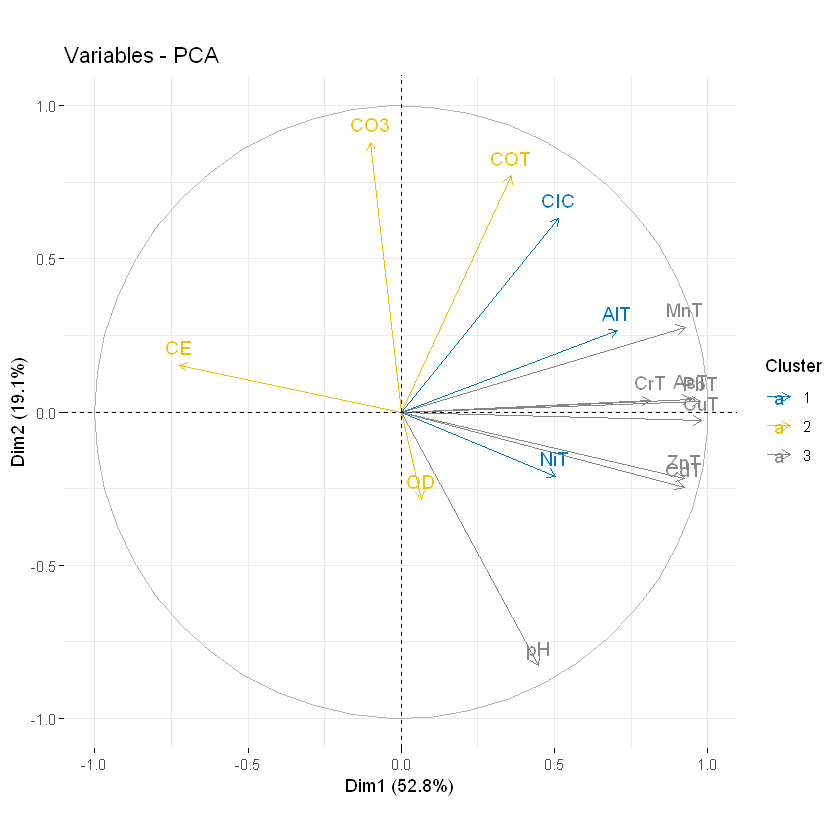

In [215]:
# Create a grouping variable using kmeans
# Create 3 groups of variables (centers = 3)
set.seed(123)
res.km <- kmeans(var$coord, centers = 3, nstart = 25)
grp <- as.factor(res.km$cluster)
# Color variables by groups
fviz_pca_var(Dat.pca, col.var = grp, 
             palette = c("#0073C2FF", "#EFC000FF", "#868686FF"),
             legend.title = "Cluster")

In [217]:
Dat.desc <- dimdesc(Dat.pca, axes = c(1,2), proba = 0.05)
# Description of dimension 1
Dat.desc$Dim.1

,correlation,p.value
CuT,0.9794836,5.678605e-14
PbT,0.9777454,1.173176e-13
AsT,0.9465283,2.793265e-10
MnT,0.9263500,4.625370e-09
ZnT,0.9242326,5.922659e-09
CdT,0.9229158,6.882321e-09
CrT,0.8146554,1.224132e-05
AlT,0.7068199,4.933489e-04
CIC,0.5145156,2.028048e-02
NiT,0.5044482,2.331775e-02


In [218]:
# Description of dimension 2
Dat.desc$Dim.2

,correlation,p.value
CO3,0.8799140,3.164969e-07
COT,0.7713411,6.833600e-05
CIC,0.6325281,2.764702e-03
pH,-0.8275272,6.733313e-06


In [219]:
ind <- get_pca_ind(Dat.pca)
ind

Principal Component Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

In [220]:
# Coordinates of individuals
head(ind$coord)
# Quality of individuals
head(ind$cos2)
# Contributions of individuals
head(ind$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
P-01TS1,-0.9798929,2.3778940,-0.22374902,-1.521326,-1.41068522
P-01TS2,-0.9798929,2.3778940,-0.22374902,-1.521326,-1.41068522
P-02TS1,1.1763902,2.7650250,0.06284223,1.138139,-0.01688589
P-02TS2,1.1763902,2.7650250,0.06284223,1.138139,-0.01688589
P-03TS1,-2.4168821,0.5497151,0.89186096,1.402910,-0.05118404
P-03T52,-2.4168821,0.5497151,0.89186096,1.402910,-0.05118404


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
P-01TS1,0.08652385,0.5095228,0.0045112917,0.2085561,1.793242e-01
P-01TS2,0.08652385,0.5095228,0.0045112917,0.2085561,1.793242e-01
P-02TS1,0.12563459,0.6940721,0.0003585169,0.1175973,2.588538e-05
P-02TS2,0.12563459,0.6940721,0.0003585169,0.1175973,2.588538e-05
P-03TS1,0.57828713,0.0299163,0.0787457109,0.1948464,2.593593e-04
P-03T52,0.57828713,0.0299163,0.0787457109,0.1948464,2.593593e-04


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
P-01TS1,0.6057425,9.8771898,0.1428567,8.490623,15.991876159
P-01TS2,0.6057425,9.8771898,0.1428567,8.490623,15.991876159
P-02TS1,0.8730390,13.3550813,0.0112689,4.752107,0.002291328
P-02TS2,0.8730390,13.3550813,0.0112689,4.752107,0.002291328
P-03TS1,3.6850364,0.5278661,2.2697219,7.220298,0.021052728
P-03T52,3.6850364,0.5278661,2.2697219,7.220298,0.021052728


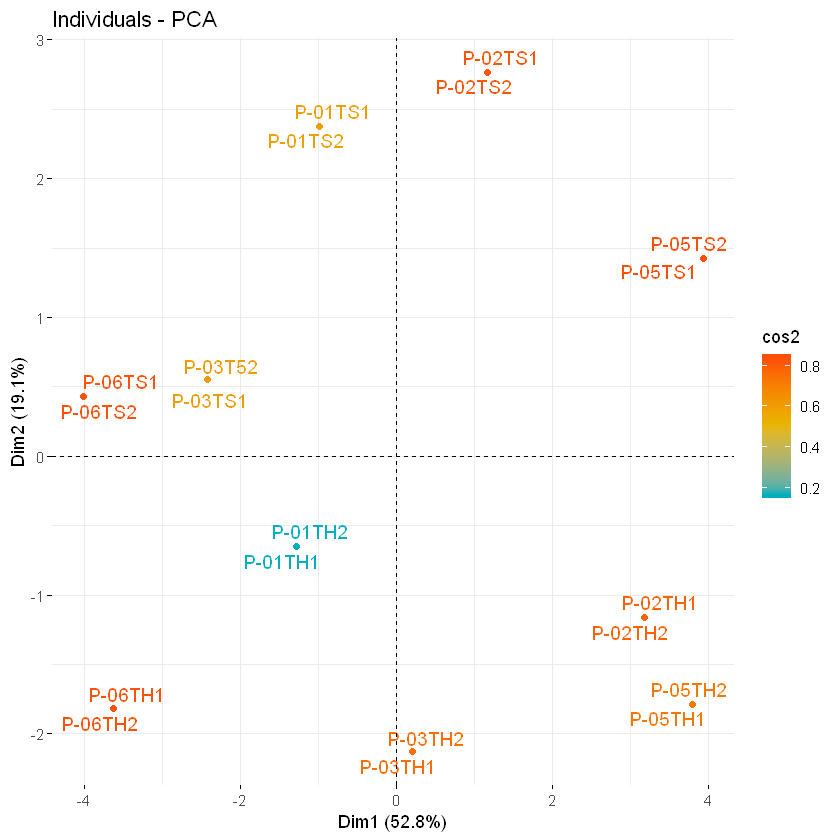

In [221]:
fviz_pca_ind(Dat.pca, col.ind = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping (slow if many points)
             )

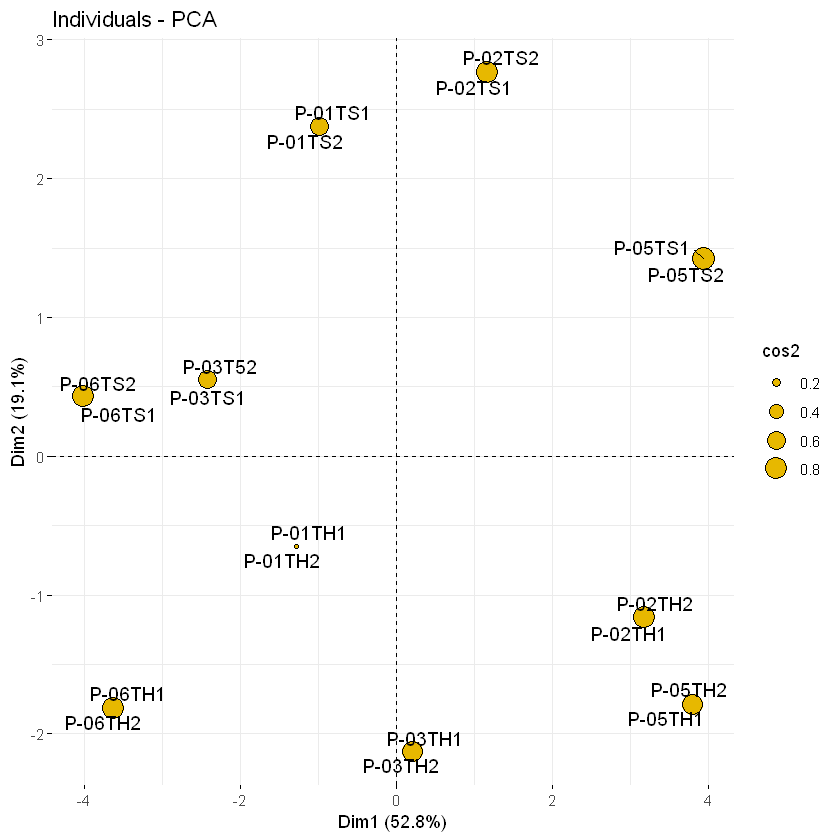

In [222]:
fviz_pca_ind(Dat.pca, pointsize = "cos2", 
             pointshape = 21, fill = "#E7B800",
             repel = TRUE # Avoid text overlapping (slow if many points)
             )

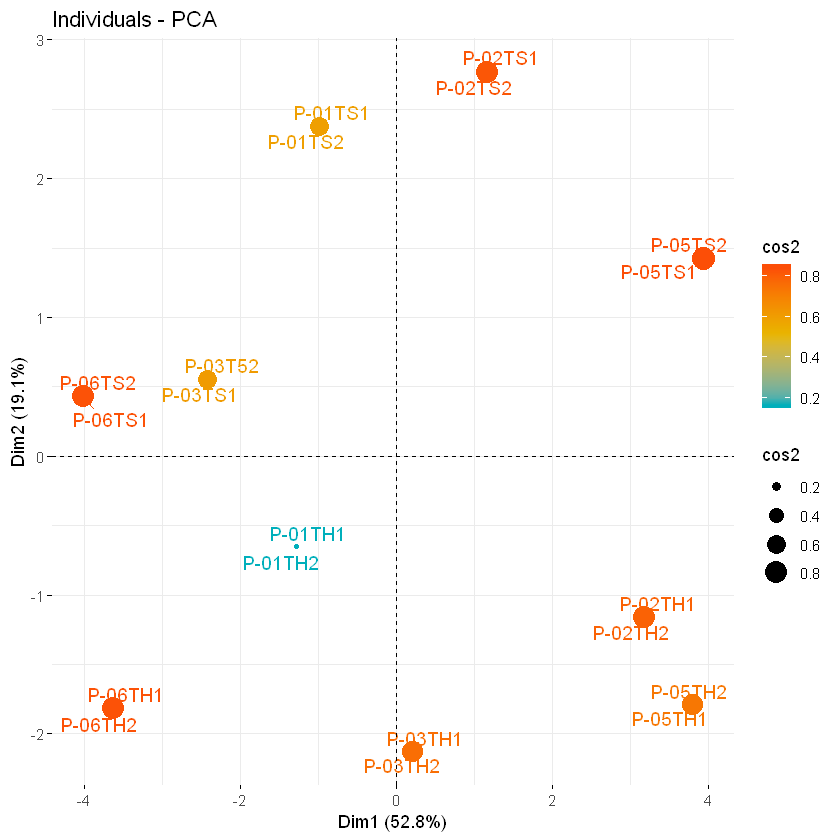

In [223]:
fviz_pca_ind(Dat.pca, col.ind = "cos2", pointsize = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping (slow if many points)
             )

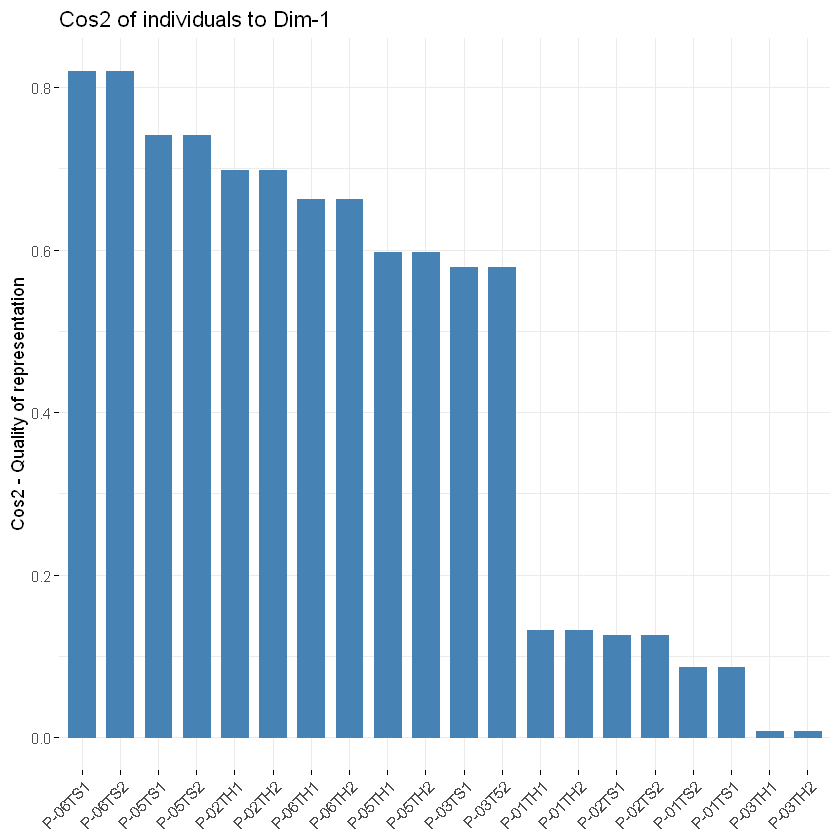

In [224]:
fviz_cos2(Dat.pca, choice = "ind")

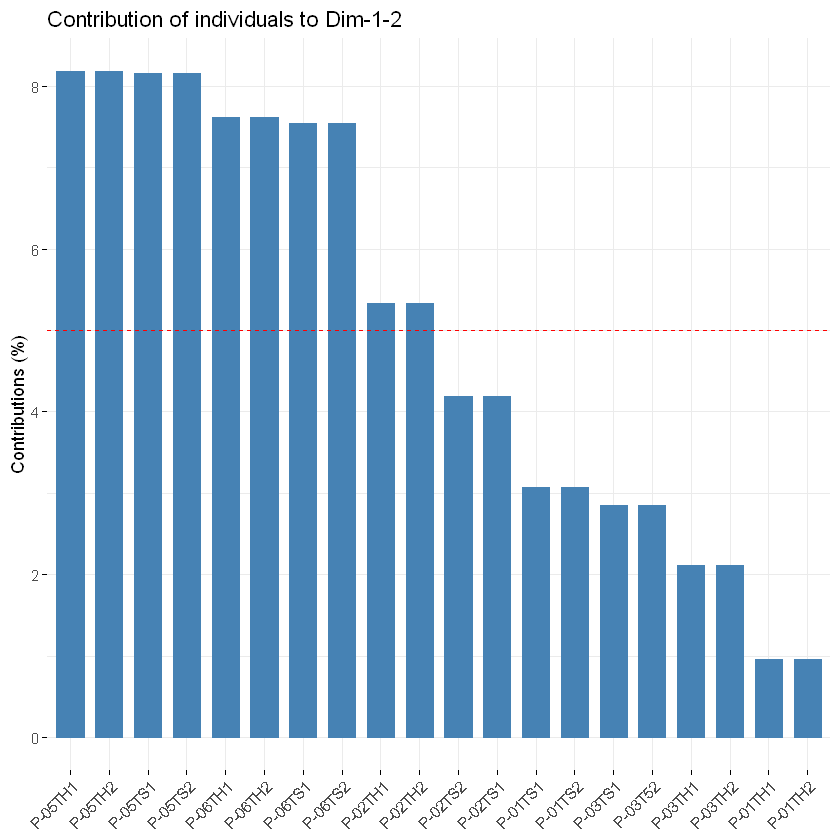

In [225]:
# Total contribution on PC1 and PC2
fviz_contrib(Dat.pca, choice = "ind", axes = 1:2)

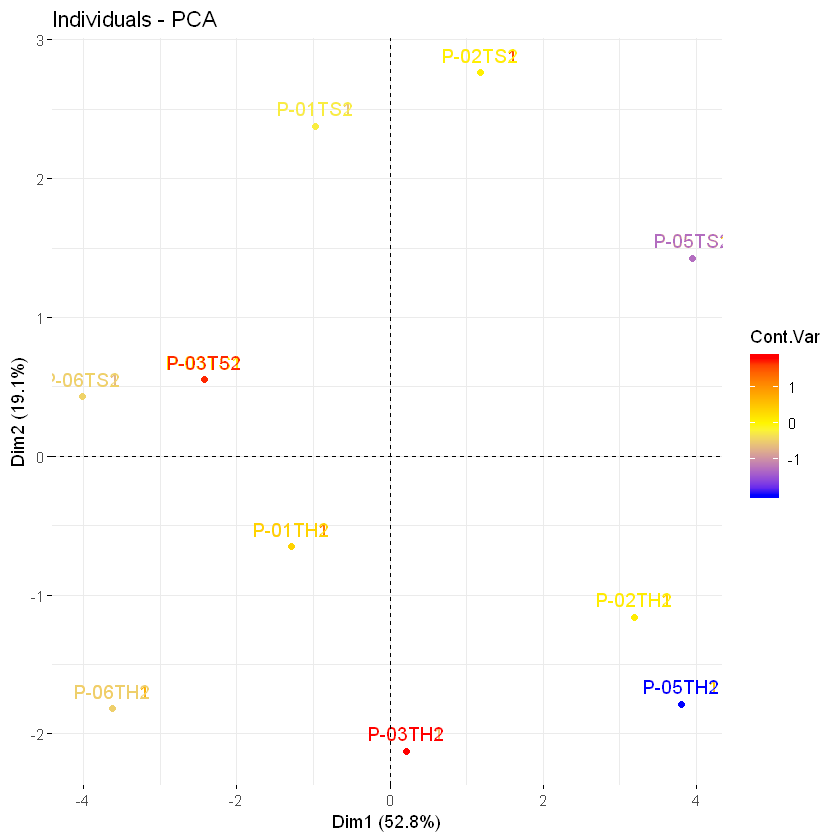

In [230]:
# Create a random continuous variable of length 23,
# Same length as the number of active individuals in the PCA
set.seed(123)
my.cont.var <- rnorm(20)
# Color individuals by the continuous variable
fviz_pca_ind(Dat.pca, col.ind = my.cont.var,
             gradient.cols = c("blue", "yellow", "red"),
             legend.title = "Cont.Var")

In [234]:
head(Datos_1, 3)

,COT,CIC,pH,CE,CO3,OD,AlT,AlF1,AlF2,AlF3,...,CdF2,CdF3,CdR,PbT,PbF1,PbF2,PbF3,PbR,Estacion,Temporada
P-01TS1,3.1245,10792.6,7.14,539,5,5.35,18256,53.08,670.16,557.80,...,0.2,1.05,0.265,201.215,27.16,64.64,4.0,91.565,P-01,S
P-01TS2,3.1245,10792.6,7.14,539,5,5.35,18256,60.32,689.04,540.70,...,0.2,1.35,0.230,201.215,29.96,65.68,4.3,84.449,P-01,S
P-02TS1,3.4826,17738.4,7.25,406,5,7.42,32670,95.36,974.80,940.25,...,0.6,1.60,0.881,464.932,61.76,254.00,12.8,188.333,P-02,S


In [270]:
# The variable Species (index = 5) is removed
# before PCA analysis
Dat_1.pca <- PCA(Datos_1[,c(1:15)], graph = FALSE)

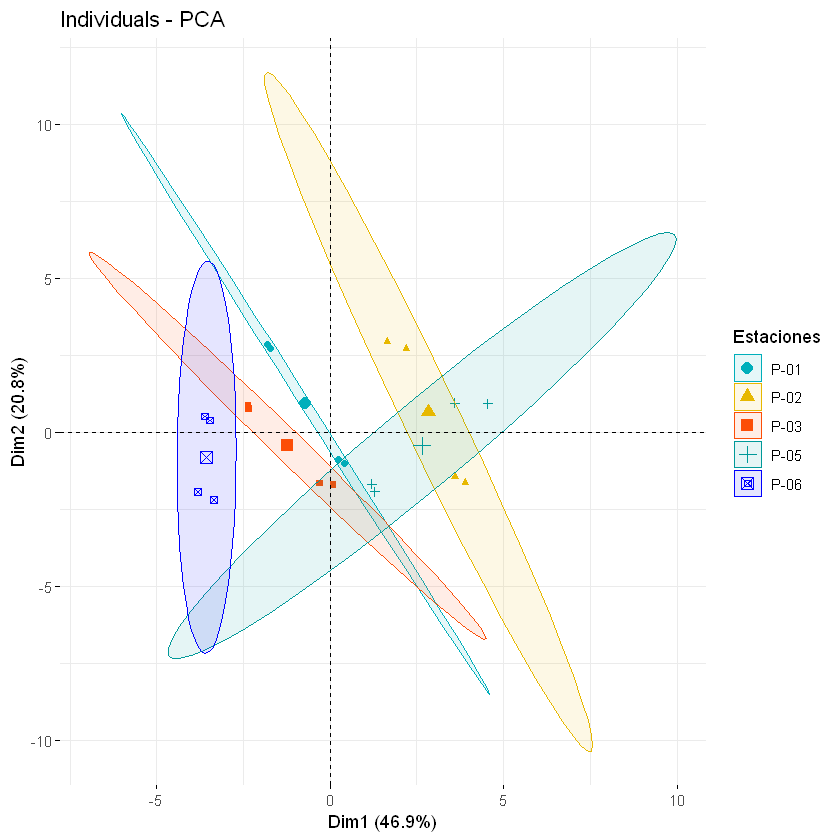

In [271]:
fviz_pca_ind(Dat_1.pca,
             geom.ind = "point", # show points only (nbut not "text")
             col.ind = Datos_1$Estacion, # color by stations
             palette = c("#00AFBB", "#E7B800", "#FC4E07","#009999", "#0000FF"),
             addEllipses = TRUE, # Concentration ellipses
             legend.title = "Estaciones"
             )

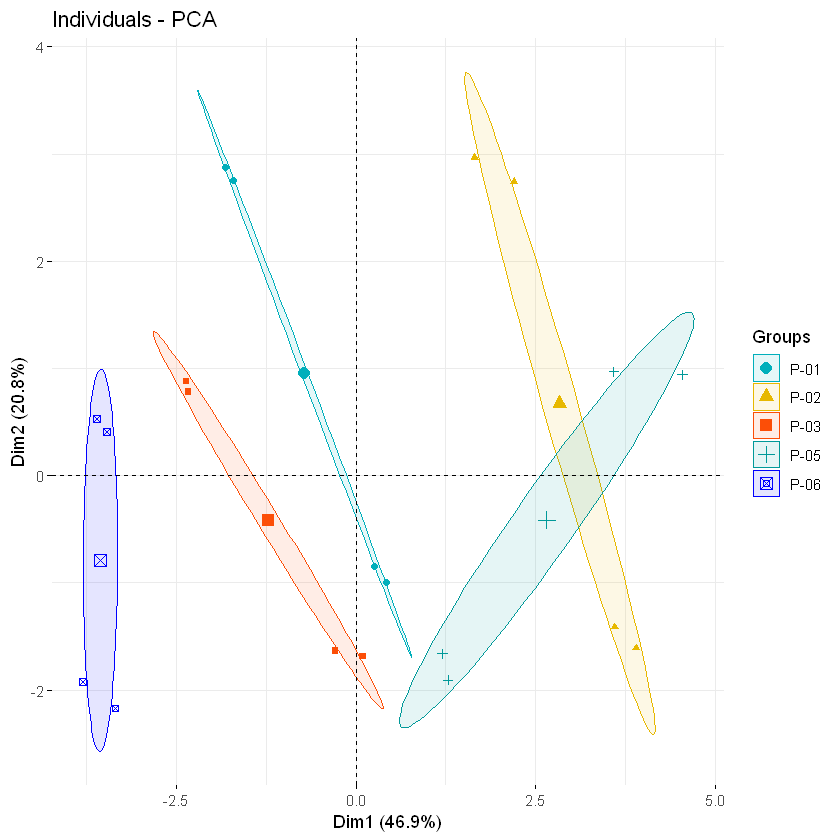

In [272]:
# Add confidence ellipses
fviz_pca_ind(Dat_1.pca, geom.ind = "point", col.ind = Datos_1$Estacion, 
             palette = c("#00AFBB", "#E7B800", "#FC4E07","#009999", "#0000FF"),
             addEllipses = TRUE, ellipse.type = "confidence",
             legend.title = "Groups"
             )

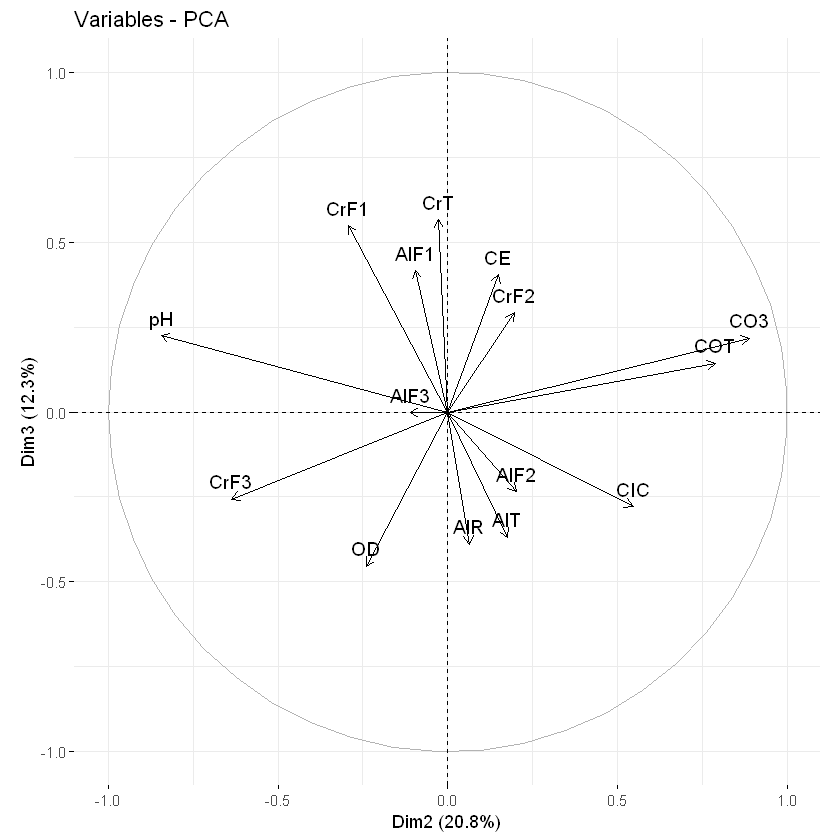

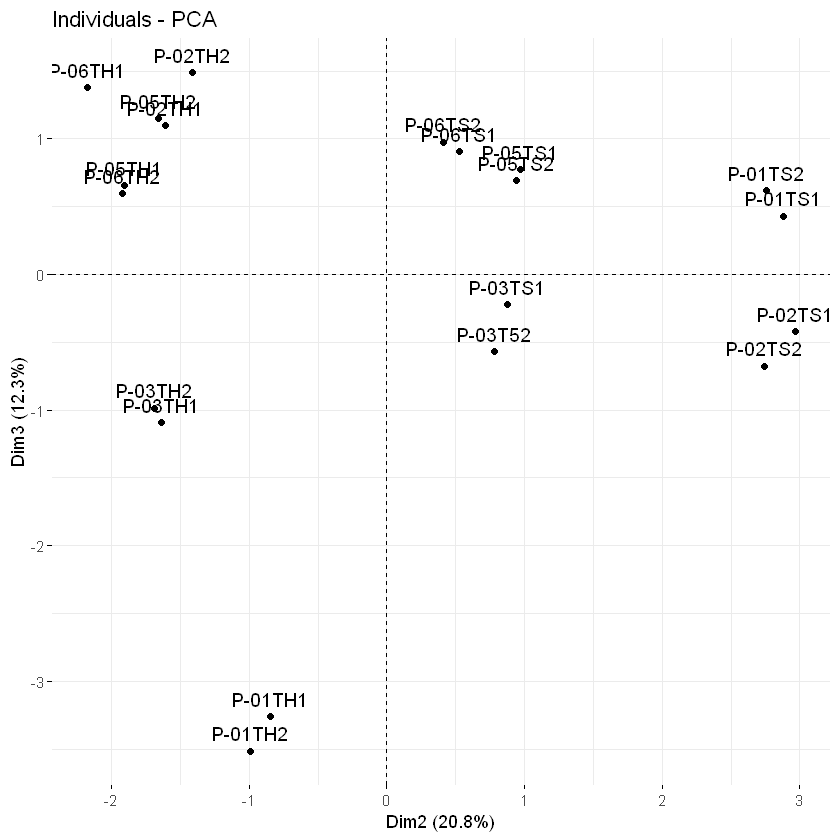

In [273]:
# Variables on dimensions 2 and 3
fviz_pca_var(Dat_1.pca, axes = c(2, 3))
# Individuals on dimensions 2 and 3
fviz_pca_ind(Dat_1.pca, axes = c(2, 3))

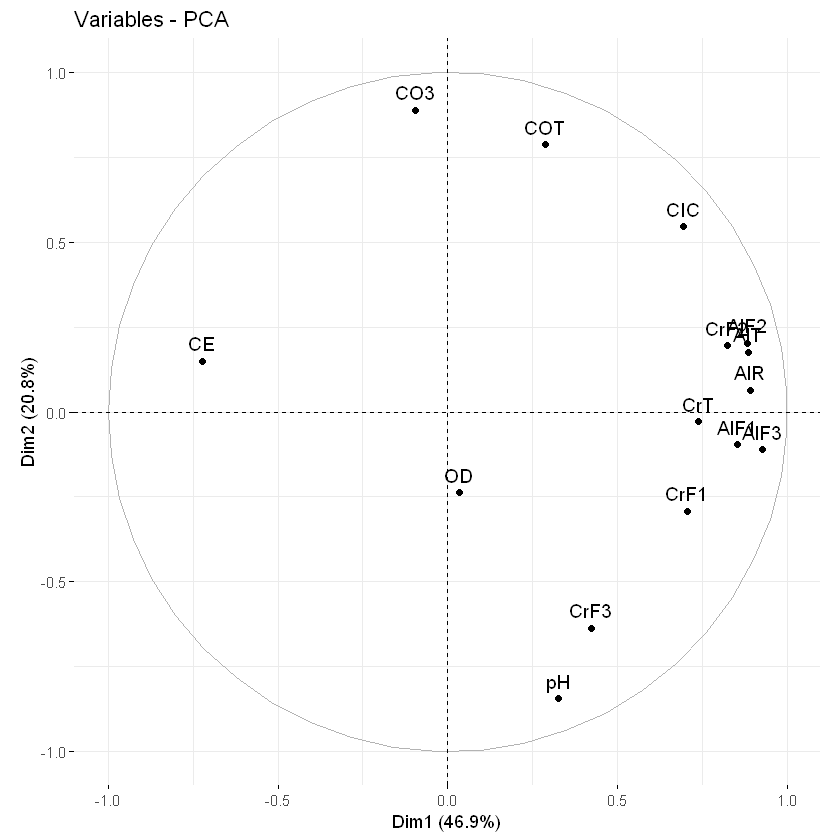

In [274]:
# Show variable points and text labels
fviz_pca_var(Dat_1.pca, geom.var = c("point", "text"))

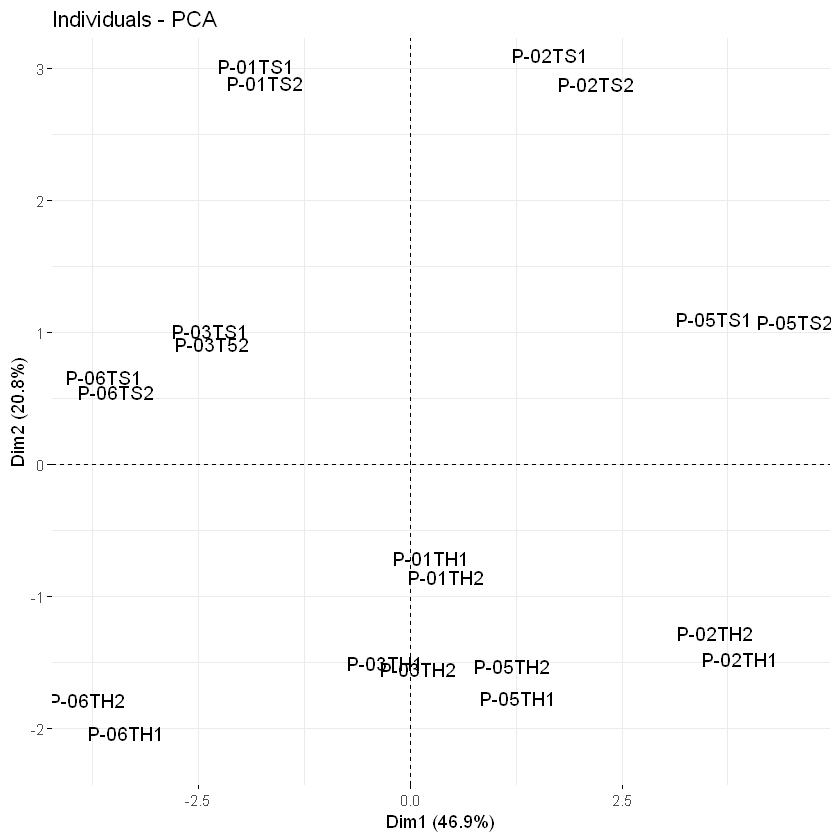

In [275]:
# Show individuals text labels only
fviz_pca_ind(Dat_1.pca, geom.ind =  "text")

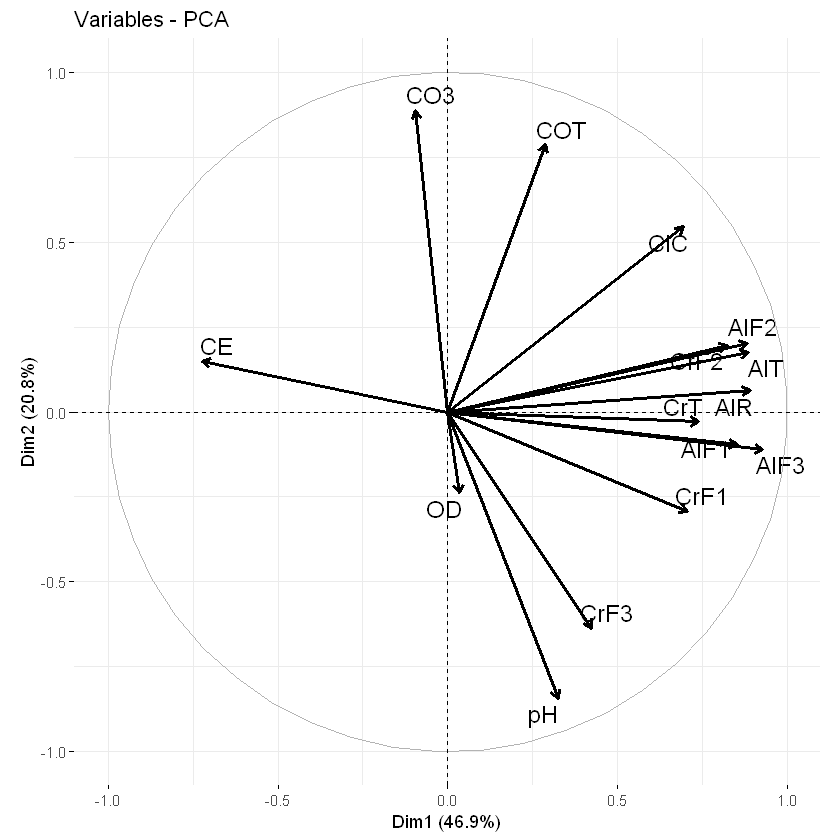

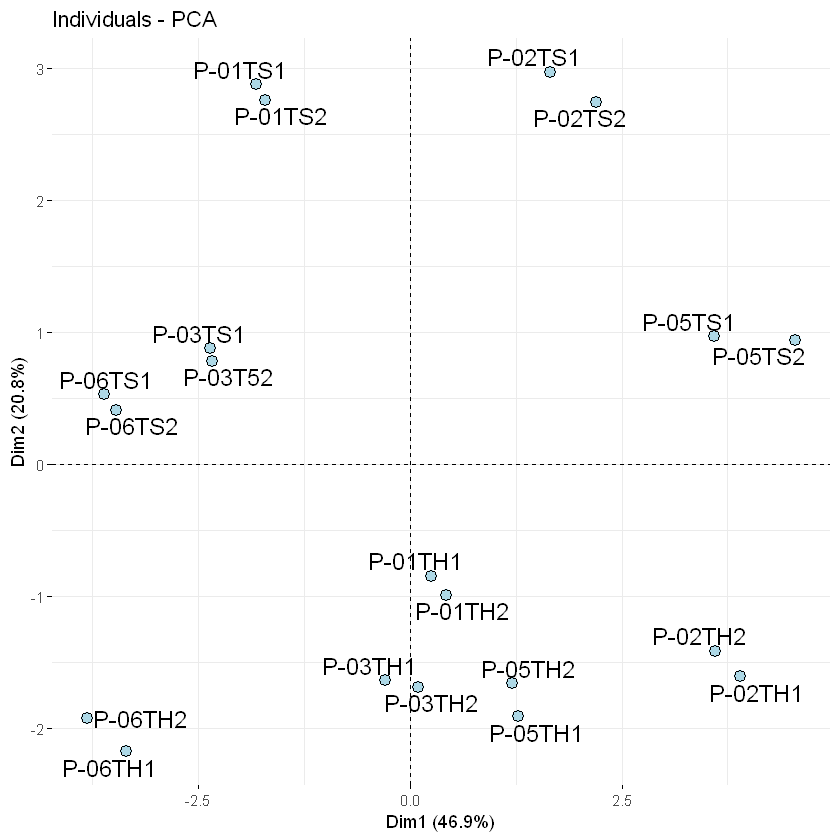

In [276]:
# Change the size of arrows an labels
fviz_pca_var(Dat_1.pca, arrowsize = 1, labelsize = 5, 
             repel = TRUE)
# Change points size, shape and fill color
# Change labelsize
fviz_pca_ind(Dat_1.pca, 
             pointsize = 3, pointshape = 21, fill = "lightblue",
             labelsize = 5, repel = TRUE)

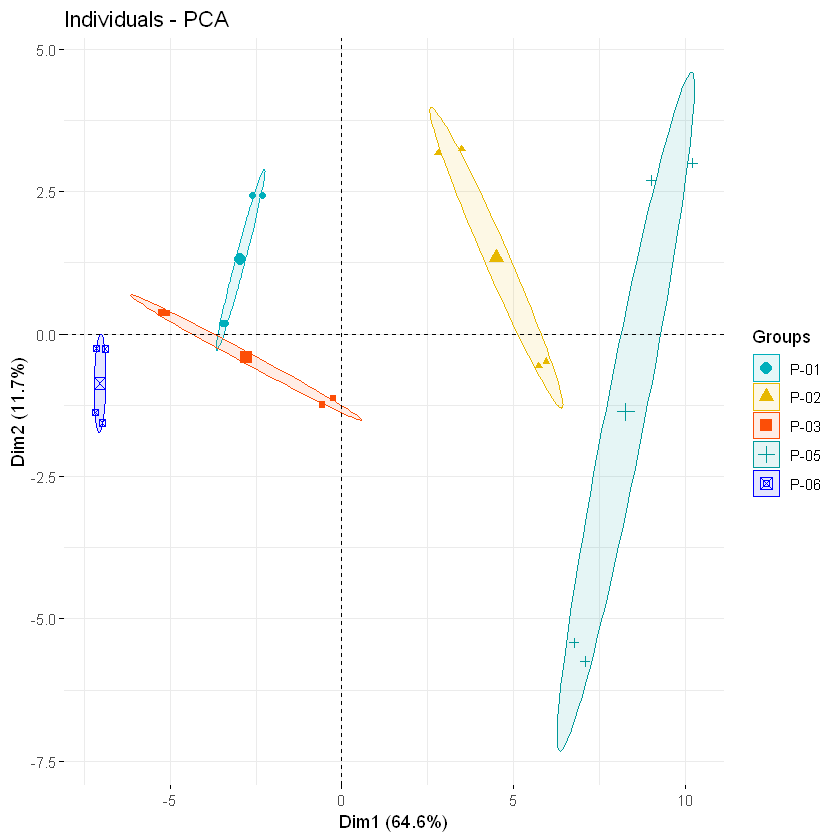

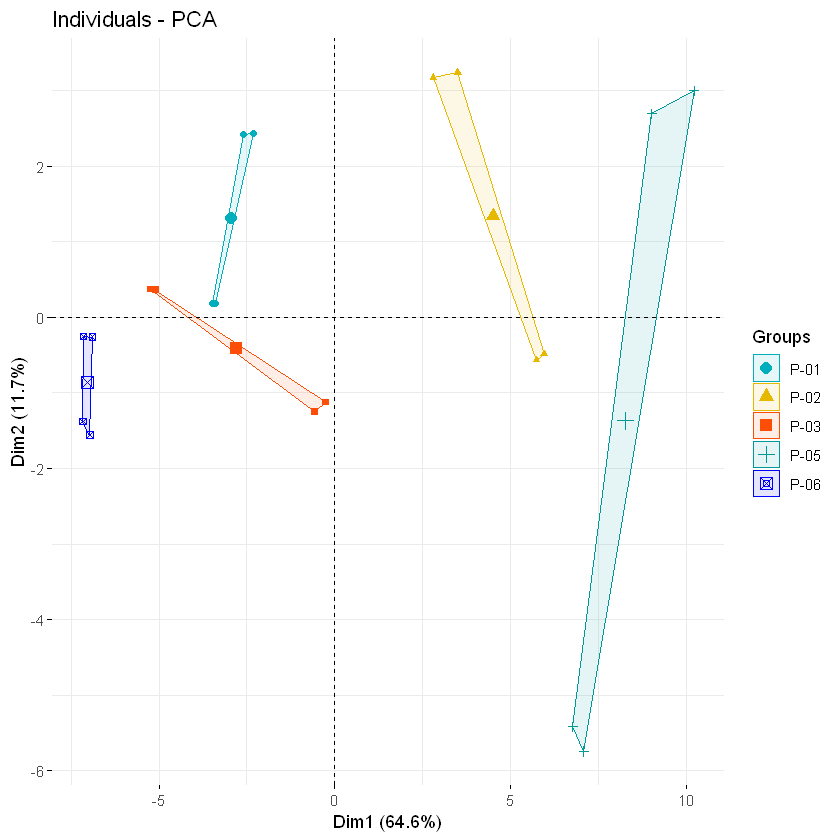

In [253]:
# Add confidence ellipses
fviz_pca_ind(Dat_1.pca, geom.ind = "point", 
             col.ind = Datos_1$Estacion, # color by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07","#009999", "#0000FF"),
             addEllipses = TRUE, ellipse.type = "confidence",
             legend.title = "Groups"
             )
# Convex hull
fviz_pca_ind(Dat_1.pca, geom.ind = "point",
             col.ind = Datos_1$Estacion, # color by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07","#009999", "#0000FF"),
             addEllipses = TRUE, ellipse.type = "convex",
             legend.title = "Groups"
             )

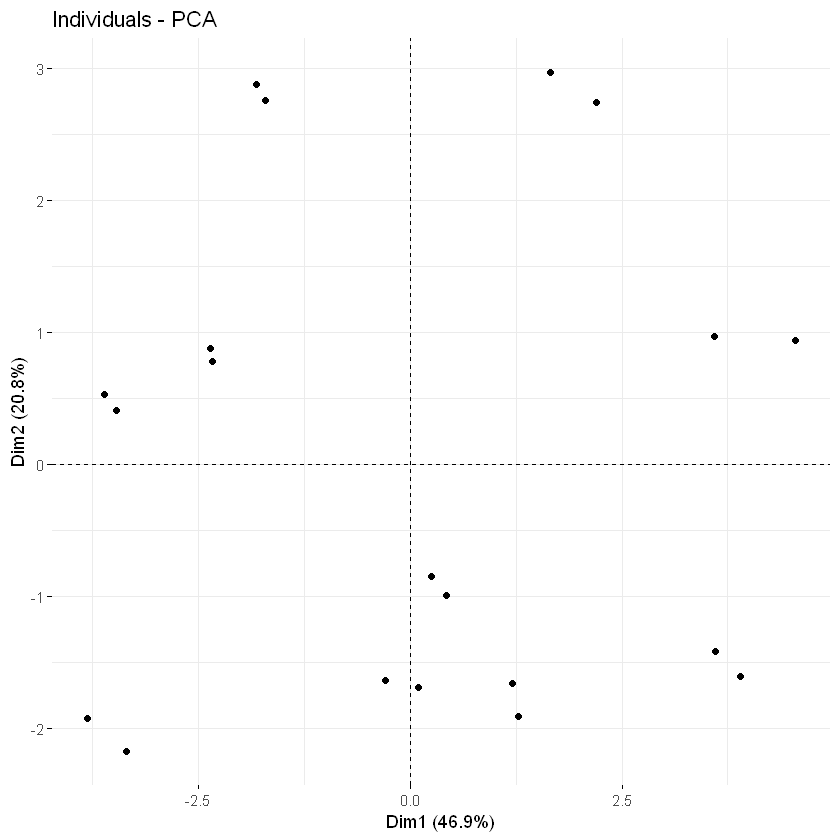

In [326]:
fviz_pca_ind(Dat_1.pca,
             geom.ind = "point", # show points only (but not "text")
             group.ind = Datos_1$Estacion, # color by groups
             legend.title = "Groups",
             mean.point = FALSE)

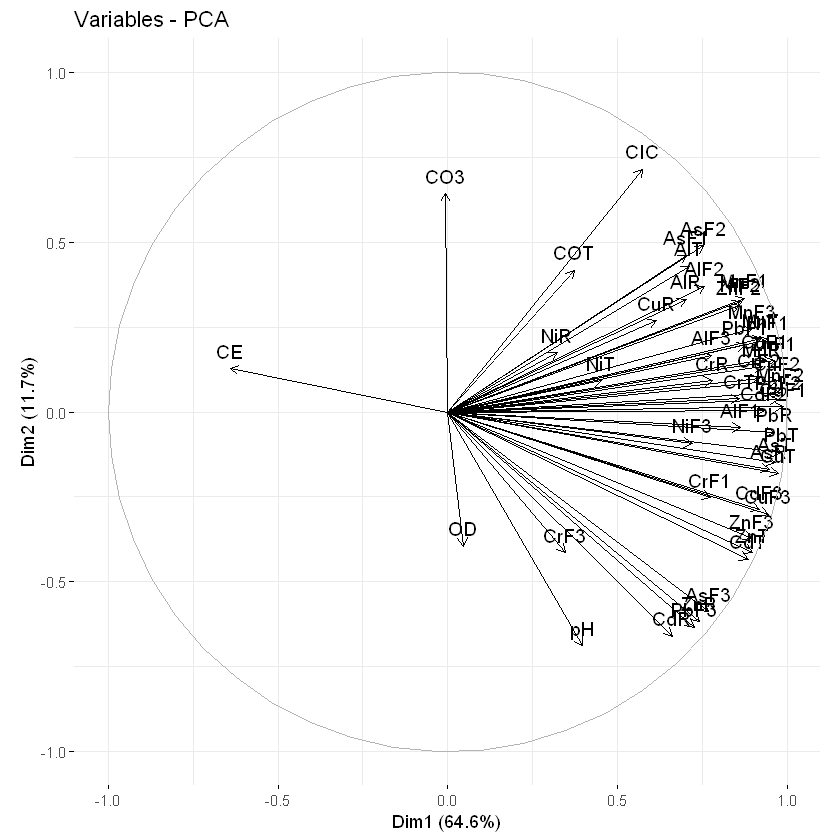

In [256]:
fviz_pca_var(Dat_1.pca, axes.linetype = "blank")

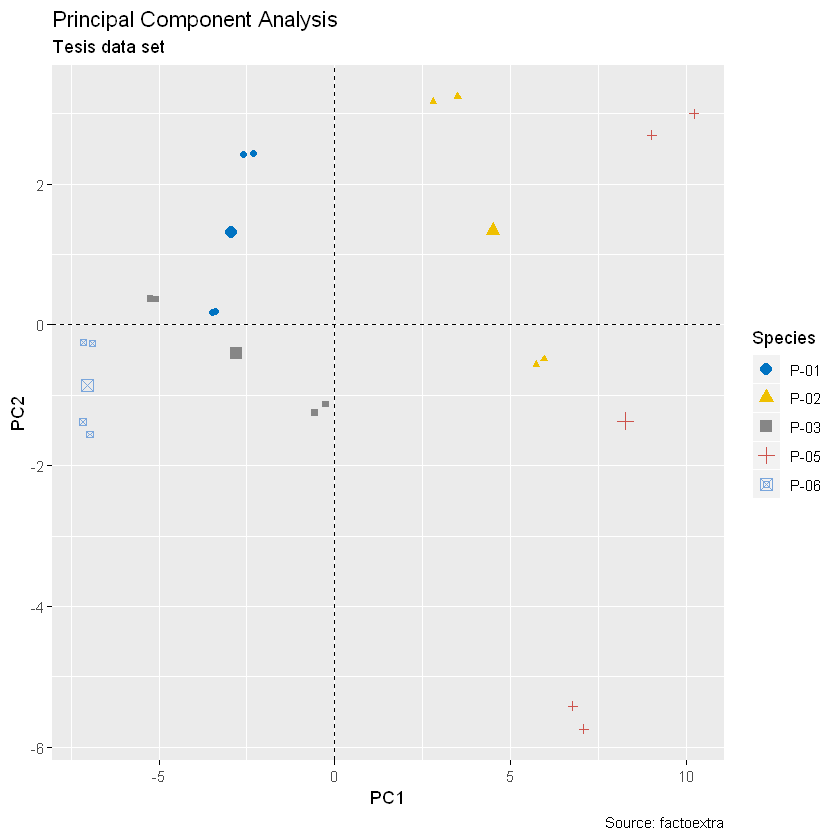

In [258]:
ind.p <- fviz_pca_ind(Dat_1.pca, geom = "point", col.ind =Datos_1$Estacion)
ggpubr::ggpar(ind.p,
              title = "Principal Component Analysis",
              subtitle = "Tesis data set",
              caption = "Source: factoextra",
              xlab = "PC1", ylab = "PC2",
              legend.title = "Species", legend.position = "top",
              ggtheme = theme_gray(), palette = "jco"
              )

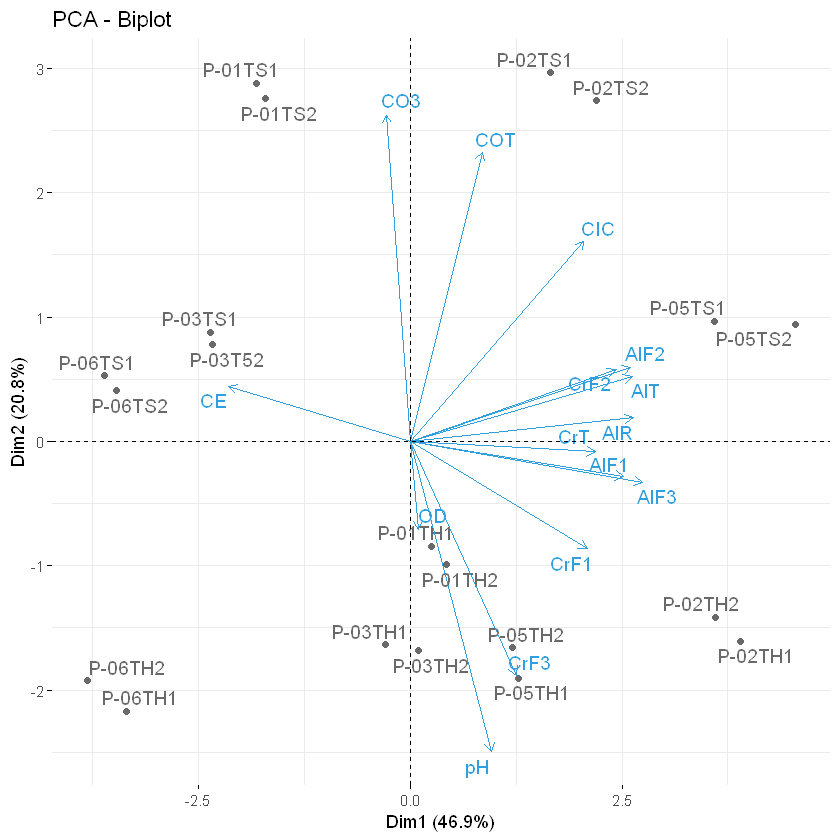

In [278]:
fviz_pca_biplot(Dat_1.pca, repel = TRUE,
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
                )

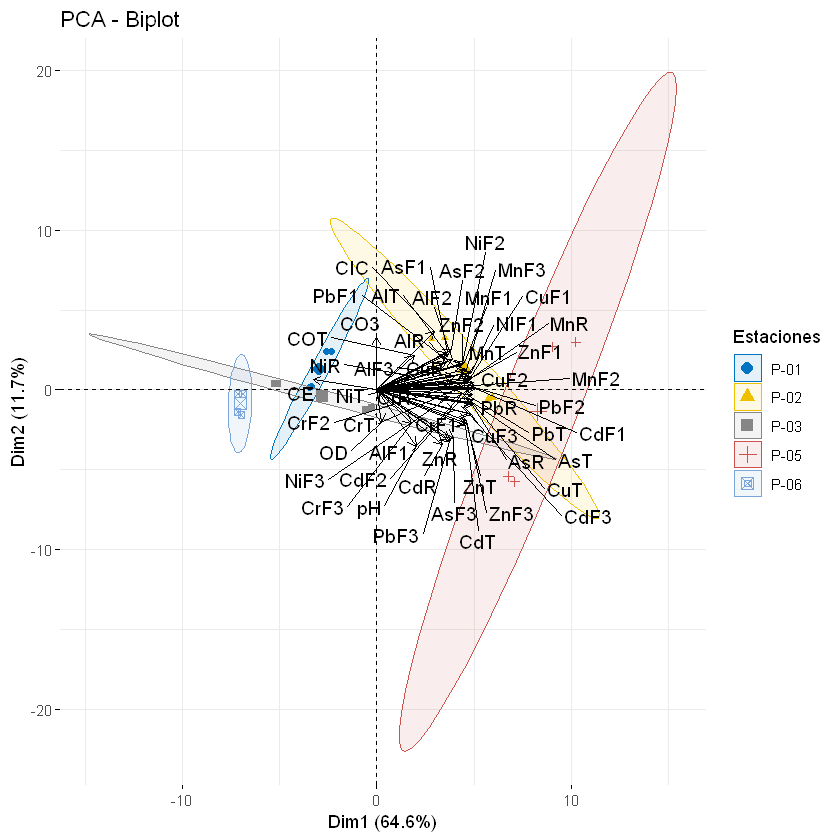

In [261]:
fviz_pca_biplot(Dat_1.pca, 
                col.ind = Datos_1$Estacion, palette = "jco", 
                addEllipses = TRUE, label = "var",
                col.var = "black", repel = TRUE,
                legend.title = "Estaciones") 

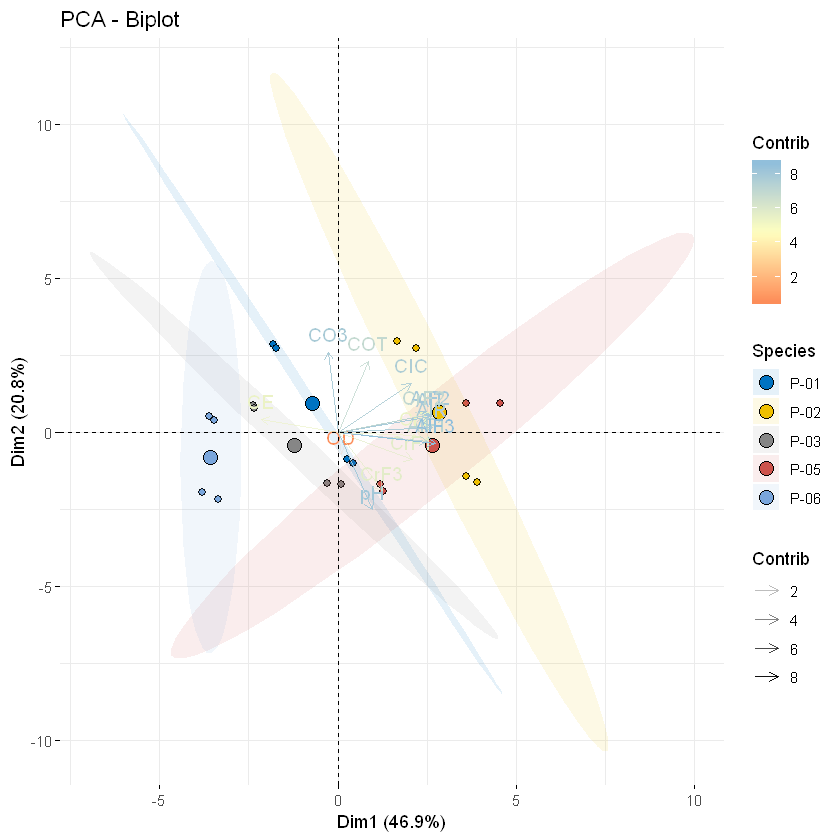

In [280]:
fviz_pca_biplot(Dat_1.pca, 
                # Individuals
                geom.ind = "point",
                fill.ind = Datos_1$Estacion, col.ind = "black",
                pointshape = 21, pointsize = 2,
                palette = "jco",
                addEllipses = TRUE,
                # Variables
                alpha.var ="contrib", col.var = "contrib",
                gradient.cols = "RdYlBu",
                
                legend.title = list(fill = "Species", color = "Contrib",
                                    alpha = "Contrib")
                )

In [307]:
Datos_1_CT<-Datos_1[,c(1:7,12,17,22,27,32,37,42,47,52,53)]
Datos_1_CT

,COT,CIC,pH,CE,CO3,OD,AlT,CrT,MnT,NiT,CuT,ZnT,AsT,CdT,PbT,Estacion,Temporada
P-01TS1,3.1245,10792.6,7.14,539.0,5.0,5.35,18256,21.486,950.117,14.443,230.477,511.349,139.289,2.964,201.215,P-01,S
P-01TS2,3.1245,10792.6,7.14,539.0,5.0,5.35,18256,21.486,950.117,14.443,230.477,511.349,139.289,2.964,201.215,P-01,S
P-02TS1,3.4826,17738.4,7.25,406.0,5.0,7.42,32670,22.187,1073.611,12.304,420.095,698.002,601.461,4.726,464.932,P-02,S
P-02TS2,3.4826,17738.4,7.25,406.0,5.0,7.42,32670,22.187,1073.611,12.304,420.095,698.002,601.461,4.726,464.932,P-02,S
P-03TS1,1.5905,8741.6,7.70,360.0,5.0,7.45,18425,15.068,536.433,7.709,89.540,219.978,89.588,1.835,87.458,P-03,S
P-03T52,1.5905,8741.6,7.70,360.0,5.0,7.45,18425,15.068,536.433,7.709,89.540,219.978,89.588,1.835,87.458,P-03,S
P-05TS1,1.4919,20127.1,7.86,317.0,5.0,6.50,37695,33.470,1362.332,15.513,664.343,1298.670,921.885,8.582,696.379,P-05,S
P-05TS2,1.4919,20127.1,7.86,317.0,5.0,6.50,37695,33.470,1362.332,15.513,664.343,1298.670,921.885,8.582,696.379,P-05,S
P-06TS1,0.7522,5671.5,7.31,955.0,5.0,7.10,8237,20.142,143.185,8.351,8.650,165.031,2.238,0.023,6.592,P-06,S
P-06TS2,0.7522,5671.5,7.31,955.0,5.0,7.10,8237,20.142,143.185,8.351,8.650,165.031,2.238,0.023,6.592,P-06,S


In [327]:
# Scree plot
scree.plot <- fviz_eig(Dat_1.pca)
# Plot of individuals
ind.plot <- fviz_pca_ind(Dat_1.pca)
# Plot of variables
var.plot <- fviz_pca_var(Dat_1.pca)

In [328]:
pdf("PCA.pdf") # Create a new pdf device
print(scree.plot)
print(ind.plot)
print(var.plot)
dev.off() # Close the pdf device

png 
  2

In [329]:
# Print scree plot to a png file
png("pca-scree-plot.png")
print(scree.plot)
dev.off()
# Print individuals plot to a png file
png("pca-variables.png")
print(var.plot)
dev.off()
# Print variables plot to a png file
png("pca-individuals.png")
print(ind.plot)
dev.off()

png 
  2

png 
  2

png 
  2

In [362]:
Dat_2.pca <- PCA(Datos_1_Num_CT, ncp = 3, graph = FALSE)

In [363]:
#Con PCA
Dat.hcpc <- HCPC(Dat_2.pca, graph = FALSE)
print(Dat.hcpc)

**Results for the Hierarchical Clustering on Principal Components**
   name                   
1  "$data.clust"          
2  "$desc.var"            
3  "$desc.var$quanti.var" 
4  "$desc.var$quanti"     
5  "$desc.axes"           
6  "$desc.axes$quanti.var"
7  "$desc.axes$quanti"    
8  "$desc.ind"            
9  "$desc.ind$para"       
10 "$desc.ind$dist"       
11 "$call"                
12 "$call$t"              
   description                                             
1  "dataset with the cluster of the individuals"           
2  "description of the clusters by the variables"          
3  "description of the cluster var. by the continuous var."
4  "description of the clusters by the continuous var."    
5  "description of the clusters by the dimensions"         
6  "description of the cluster var. by the axes"           
7  "description of the clusters by the axes"               
8  "description of the clusters by the individuals"        
9  "parangons of each clusters"          

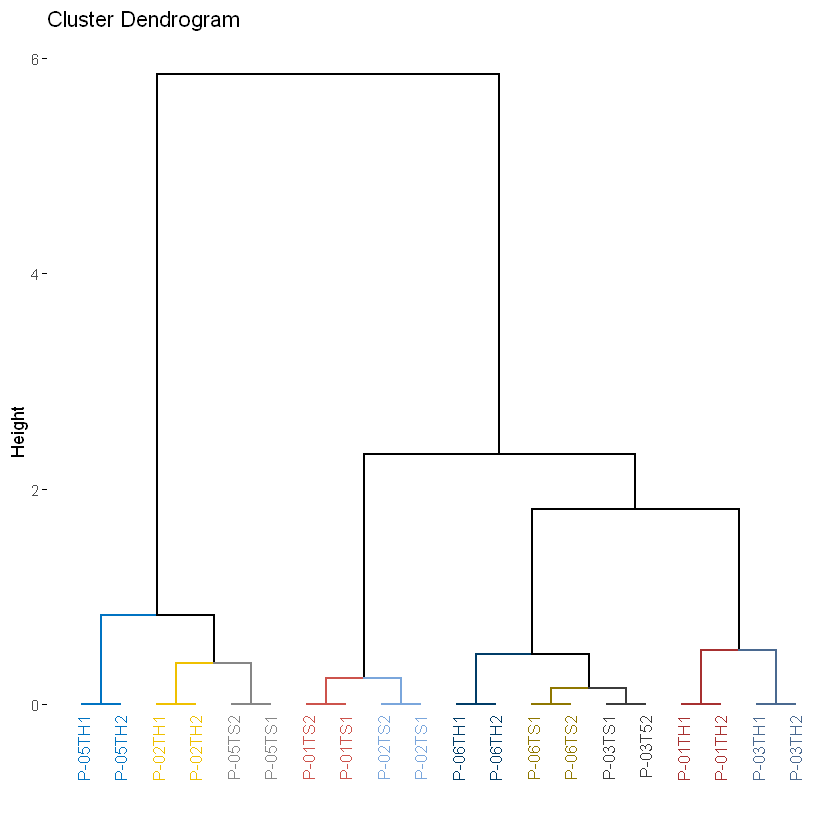

In [374]:
fviz_dend(Dat.hcpc, 
          cex = 0.7,                     # Label size
          palette = "jco",               # Color palette see ?ggpubr::ggpar
          rect = FALSE, rect_fill = TRUE, # Add rectangle around groups
          rect_border = "jco",           # Rectangle color
          labels_track_height = 0.8      # Augment the room for labels
          )

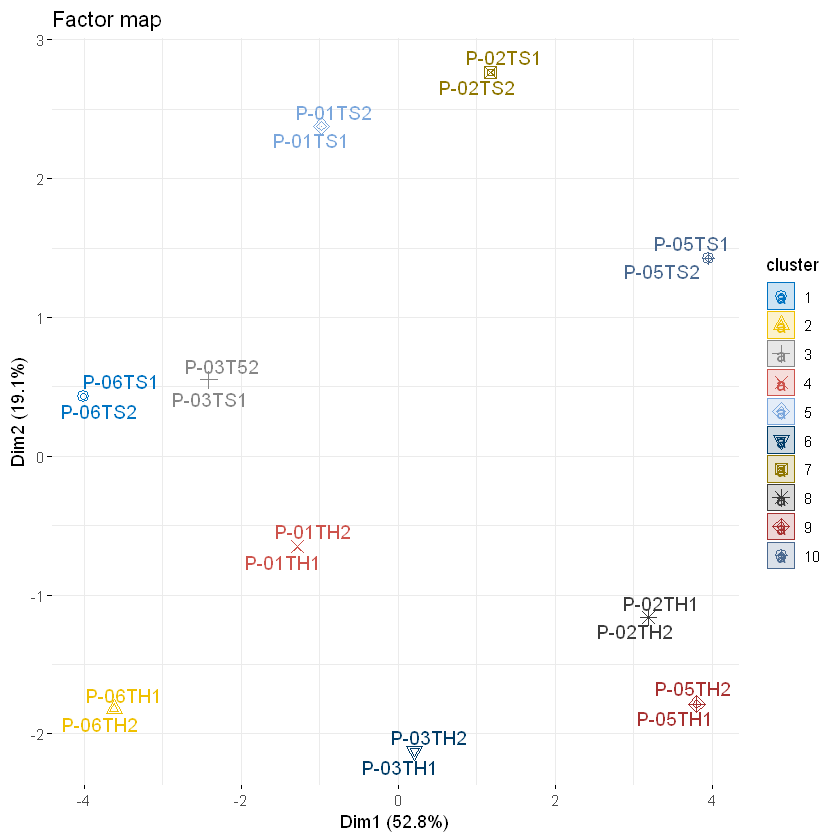

In [358]:
fviz_cluster(Dat.hcpc,
             repel = TRUE,            # Avoid label overlapping
             show.clust.cent = TRUE, # Show cluster centers
             palette = "jco",         # Color palette see ?ggpubr::ggpar
             ggtheme = theme_minimal(),
             main = "Factor map"
             )

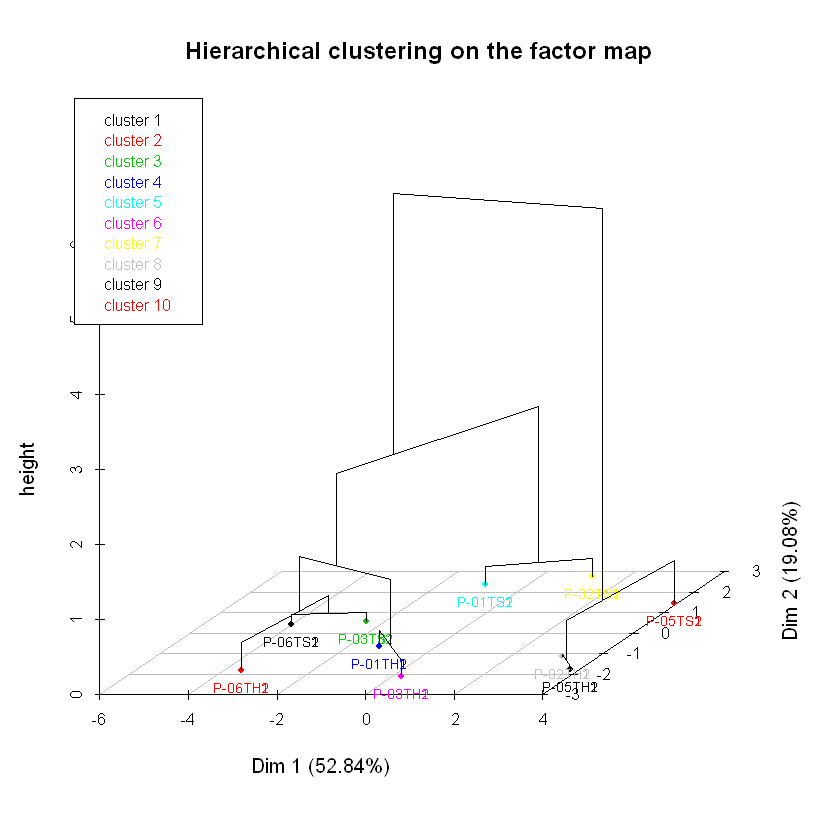

In [359]:
# Principal components + tree
plot(Dat.hcpc, choice = "3D.map")

In [360]:
head(Dat.hcpc$data.clust, 10)

,COT,CIC,pH,CE,CO3,OD,AlT,CrT,MnT,NiT,CuT,ZnT,AsT,CdT,PbT,clust
P-01TS1,3.1245,10792.6,7.14,539,5,5.35,18256,21.486,950.117,14.443,230.477,511.349,139.289,2.964,201.215,5
P-01TS2,3.1245,10792.6,7.14,539,5,5.35,18256,21.486,950.117,14.443,230.477,511.349,139.289,2.964,201.215,5
P-02TS1,3.4826,17738.4,7.25,406,5,7.42,32670,22.187,1073.611,12.304,420.095,698.002,601.461,4.726,464.932,7
P-02TS2,3.4826,17738.4,7.25,406,5,7.42,32670,22.187,1073.611,12.304,420.095,698.002,601.461,4.726,464.932,7
P-03TS1,1.5905,8741.6,7.70,360,5,7.45,18425,15.068,536.433,7.709,89.540,219.978,89.588,1.835,87.458,3
P-03T52,1.5905,8741.6,7.70,360,5,7.45,18425,15.068,536.433,7.709,89.540,219.978,89.588,1.835,87.458,3
P-05TS1,1.4919,20127.1,7.86,317,5,6.50,37695,33.470,1362.332,15.513,664.343,1298.670,921.885,8.582,696.379,10
P-05TS2,1.4919,20127.1,7.86,317,5,6.50,37695,33.470,1362.332,15.513,664.343,1298.670,921.885,8.582,696.379,10
P-06TS1,0.7522,5671.5,7.31,955,5,7.10,8237,20.142,143.185,8.351,8.650,165.031,2.238,0.023,6.592,1
P-06TS2,0.7522,5671.5,7.31,955,5,7.10,8237,20.142,143.185,8.351,8.650,165.031,2.238,0.023,6.592,1


In [378]:
Datos_totales.hcpc <- HCPC(Datos_1_Num, graph = FALSE)
print(Datos_totales.hcpc)

**Results for the Hierarchical Clustering on Principal Components**
   name                   
1  "$data.clust"          
2  "$desc.var"            
3  "$desc.var$quanti.var" 
4  "$desc.var$quanti"     
5  "$desc.axes"           
6  "$desc.axes$quanti.var"
7  "$desc.axes$quanti"    
8  "$desc.ind"            
9  "$desc.ind$para"       
10 "$desc.ind$dist"       
11 "$call"                
12 "$call$t"              
   description                                             
1  "dataset with the cluster of the individuals"           
2  "description of the clusters by the variables"          
3  "description of the cluster var. by the continuous var."
4  "description of the clusters by the continuous var."    
5  "description of the clusters by the dimensions"         
6  "description of the cluster var. by the axes"           
7  "description of the clusters by the axes"               
8  "description of the clusters by the individuals"        
9  "parangons of each clusters"          

In [379]:
head(Datos_totales.hcpc$data.clust, 10)

,COT,CIC,pH,CE,CO3,OD,AlT,AlF1,AlF2,AlF3,...,CdF1,CdF2,CdF3,CdR,PbT,PbF1,PbF2,PbF3,PbR,clust
P-01TS1,3.1245,10792.6,7.14,539,5,5.35,18256,53.08,670.16,557.80,...,0.80,0.20,1.05,0.265,201.215,27.16,64.64,4.00,91.565,2
P-01TS2,3.1245,10792.6,7.14,539,5,5.35,18256,60.32,689.04,540.70,...,0.84,0.20,1.35,0.230,201.215,29.96,65.68,4.30,84.449,2
P-02TS1,3.4826,17738.4,7.25,406,5,7.42,32670,95.36,974.80,940.25,...,2.32,0.60,1.60,0.881,464.932,61.76,254.00,12.80,188.333,3
P-02TS2,3.4826,17738.4,7.25,406,5,7.42,32670,111.16,1071.16,1076.90,...,2.20,0.68,1.80,0.854,464.932,59.20,286.60,11.60,182.094,3
P-03TS1,1.5905,8741.6,7.70,360,5,7.45,18425,67.80,517.52,314.30,...,0.84,0.20,0.60,0.023,87.458,17.08,36.24,2.10,13.664,2
P-03T52,1.5905,8741.6,7.70,360,5,7.45,18425,57.92,476.92,328.35,...,0.76,0.16,0.65,0.023,87.458,17.60,35.92,2.40,10.729,2
P-05TS1,1.4919,20127.1,7.86,317,5,6.50,37695,149.88,858.92,1190.45,...,3.28,1.04,3.25,1.664,696.379,123.04,325.04,36.60,261.896,3
P-05TS2,1.4919,20127.1,7.86,317,5,6.50,37695,168.08,1132.56,1432.70,...,3.24,1.36,3.70,1.667,696.379,124.84,419.12,35.45,234.338,3
P-06TS1,0.7522,5671.5,7.31,955,5,7.10,8237,61.00,352.84,299.65,...,0.24,0.08,0.40,0.023,6.592,1.12,3.36,0.85,0.077,1
P-06TS2,0.7522,5671.5,7.31,955,5,7.10,8237,70.12,373.84,371.95,...,0.24,0.08,0.45,0.023,6.592,1.08,4.48,1.05,0.077,1


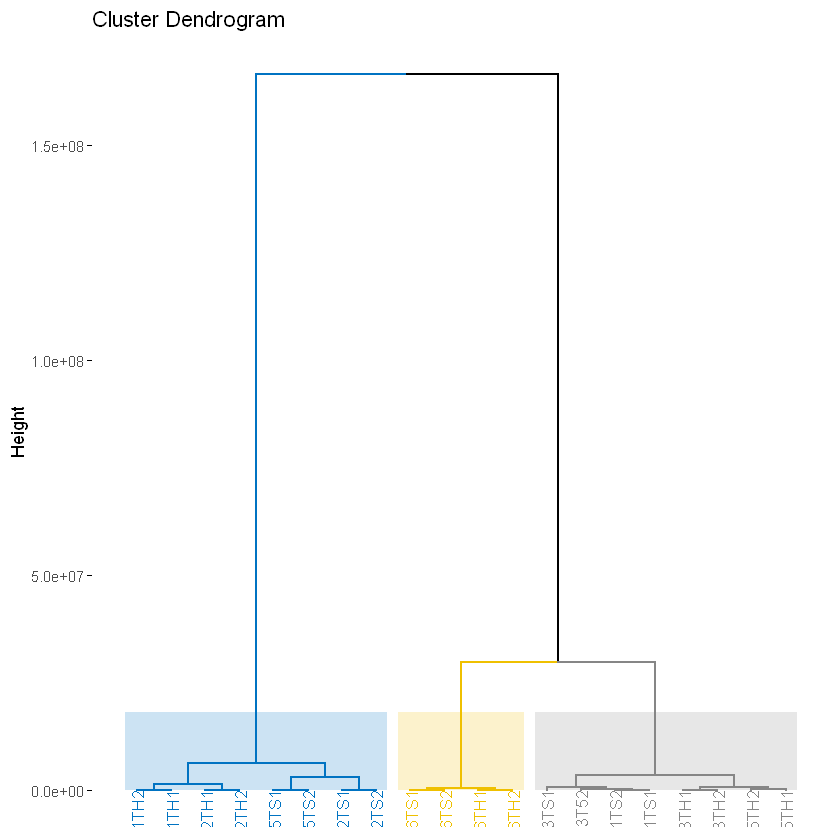

In [381]:
fviz_dend(Datos_totales.hcpc, 
          cex = 0.7,                     # Label size
          palette = "jco",               # Color palette see ?ggpubr::ggpar
          rect = TRUE, rect_fill = TRUE, # Add rectangle around groups
          rect_border = "jco",           # Rectangle color
          labels_track_height = 0.8      # Augment the room for labels
          )

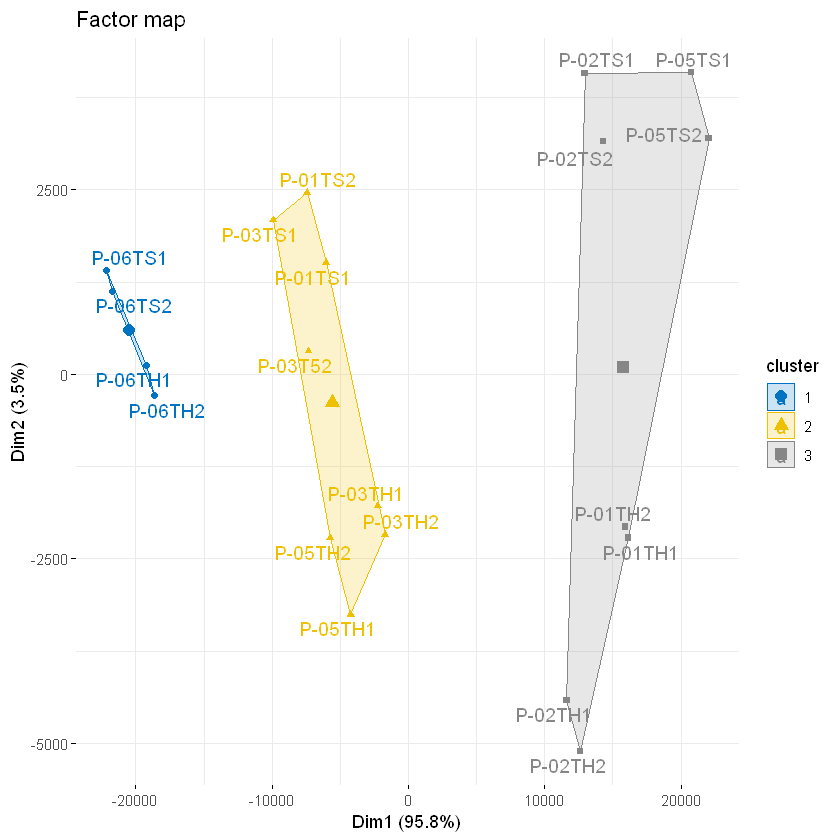

In [382]:
fviz_cluster(Datos_totales.hcpc,
             repel = TRUE,            # Avoid label overlapping
             show.clust.cent = TRUE, # Show cluster centers
             palette = "jco",         # Color palette see ?ggpubr::ggpar
             ggtheme = theme_minimal(),
             main = "Factor map"
             )

In [377]:
df <- Datos_1_Num
df <- na.omit(df)
df <- scale(df)
head(df)

,COT,CIC,pH,CE,CO3,OD,AlT,AlF1,AlF2,AlF3,...,CdT,CdF1,CdF2,CdF3,CdR,PbT,PbF1,PbF2,PbF3,PbR
P-01TS1,1.475565,0.0206106,-1.4881335,0.38510441,0.9689922,-1.8802283,-0.5030046,-0.79723449,-0.15825281,-0.5567138,...,-0.46432481,-0.6619256,-0.8380085,-0.54876625,-0.4687926,-0.4043416,-0.2292138,-0.5991418,-0.5838739,-0.1568954
P-01TS2,1.475565,0.0206106,-1.4881335,0.38510441,0.9689922,-1.8802283,-0.5030046,-0.65562145,-0.08928047,-0.5929454,...,-0.46432481,-0.6258140,-0.8380085,-0.31491700,-0.4857981,-0.4043416,-0.1557831,-0.5914499,-0.5739404,-0.2270608
P-02TS1,1.793432,1.4313032,-1.2157630,-0.02046124,0.9689922,0.6389125,0.9820448,0.02975439,0.95465692,0.2536238,...,-0.08834121,0.7103151,0.1421184,-0.12004262,-0.1694961,0.5366815,0.6781793,0.8013907,-0.2924915,0.7972589
P-02TS2,1.793432,1.4313032,-1.2157630,-0.02046124,0.9689922,0.6389125,0.9820448,0.33879943,1.30667892,0.5431587,...,-0.08834121,0.6019803,0.3381438,0.03585689,-0.1826146,0.5366815,0.6110427,1.0425048,-0.3322255,0.7357410
P-03TS1,0.113912,-0.3959477,-0.1015199,-0.16073207,0.9689922,0.6754218,-0.4855928,-0.50931405,-0.71587670,-1.0726432,...,-0.70523599,-0.6258140,-0.8380085,-0.89954013,-0.5863733,-0.8102614,-0.4935641,-0.8091921,-0.6467859,-0.9250169
P-03T52,0.113912,-0.3959477,-0.1015199,-0.16073207,0.9689922,0.6754218,-0.4855928,-0.70256500,-0.86419648,-1.0428739,...,-0.70523599,-0.6980372,-0.9360212,-0.86056526,-0.5863733,-0.8102614,-0.4799270,-0.8115589,-0.6368525,-0.9539567


#Agglomerative Hierarchical Clustering

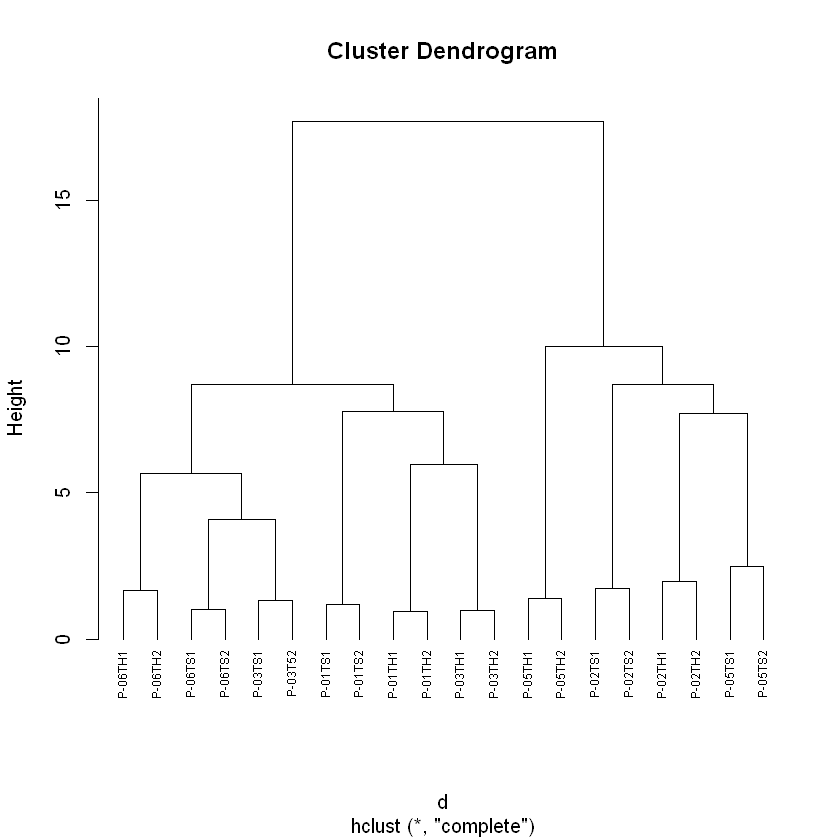

In [383]:
# Dissimilarity matrix
d <- dist(df, method = "euclidean")

# Hierarchical clustering using Complete Linkage
hc1 <- hclust(d, method = "complete" )

# Plot the obtained dendrogram
plot(hc1, cex = 0.6, hang = -1)

In [388]:
library(cluster)    # clustering algorithms
library(dendextend) # for comparing two dendrograms
# Compute with agnes
hc2 <- agnes(df, method = "complete")

In [389]:
# Agglomerative coefficient
hc2$ac

[1] 0.9173189

In [391]:
# methods to assess
m <- c( "average", "single", "complete", "ward")
names(m) <- c( "average", "single", "complete", "ward")

# function to compute coefficient
ac <- function(x) {
  agnes(df, method = x)$ac
}

map_dbl(m, ac)

average    single  complete      ward 
0.8795179 0.8140144 0.9173189 0.9546949

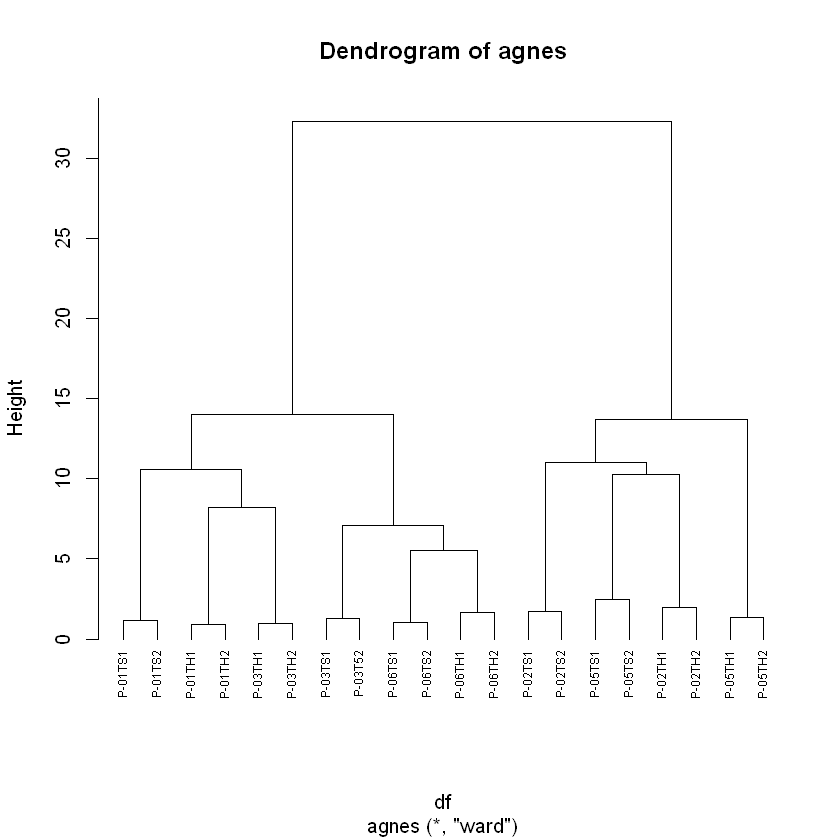

In [392]:
hc3 <- agnes(df, method = "ward")
pltree(hc3, cex = 0.6, hang = -1, main = "Dendrogram of agnes") 

Divisive Hierarchical Clustering

[1] 0.9173189

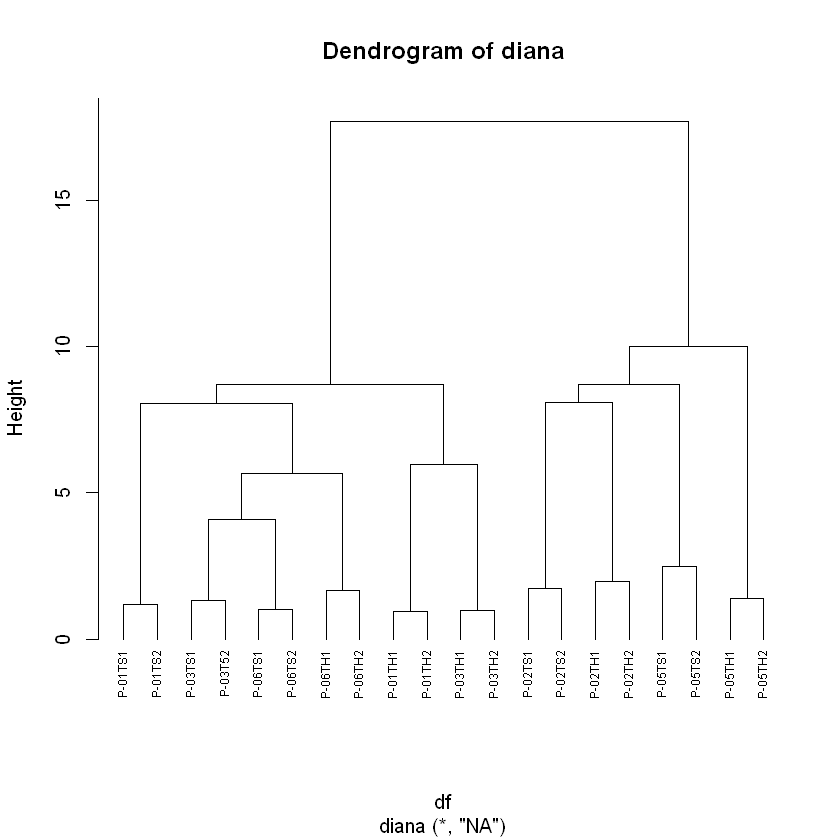

In [393]:
# compute divisive hierarchical clustering
hc4 <- diana(df)

# Divise coefficient; amount of clustering structure found
hc4$dc

# plot dendrogram
pltree(hc4, cex = 0.6, hang = -1, main = "Dendrogram of diana")

In [394]:
# Ward's method
hc5 <- hclust(d, method = "ward.D2" )

# Cut tree into 4 groups
sub_grp <- cutree(hc5, k = 4)

# Number of members in each cluster
table(sub_grp)
## sub_grp
##  1  2  3  4 
##  7 12 19 12

sub_grp
1 2 3 4 
6 6 6 2 

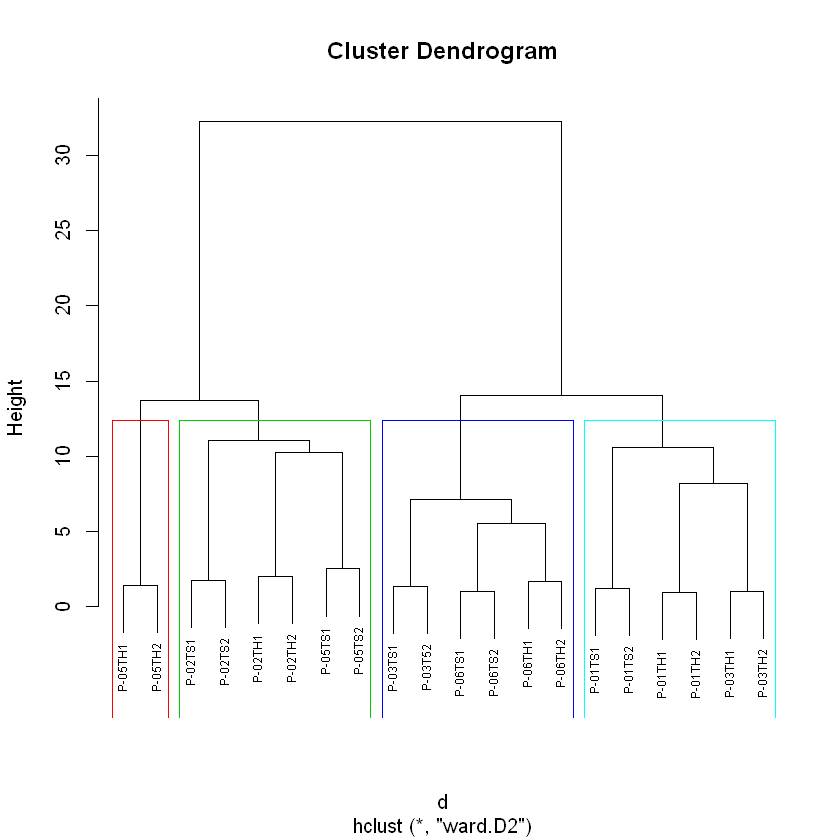

In [396]:
plot(hc5, cex = 0.6)
rect.hclust(hc5, k = 4, border = 2:5)

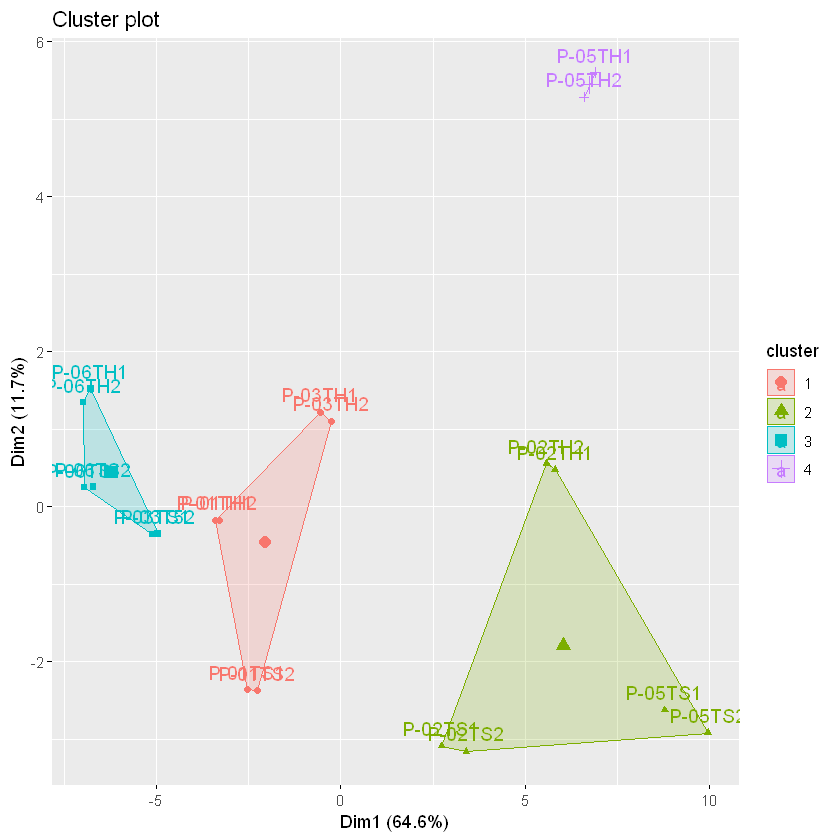

In [397]:
fviz_cluster(list(data = df, cluster = sub_grp))

In [398]:
# Cut agnes() tree into 4 groups
hc_a <- agnes(df, method = "ward")
cutree(as.hclust(hc_a), k = 4)

# Cut diana() tree into 4 groups
hc_d <- diana(df)
cutree(as.hclust(hc_d), k = 4)

P-01TS1 P-01TS2 P-02TS1 P-02TS2 P-03TS1 P-03T52 P-05TS1 P-05TS2 P-06TS1 P-06TS2 
      1       1       2       2       3       3       2       2       3       3 
P-01TH1 P-01TH2 P-02TH1 P-02TH2 P-03TH1 P-03TH2 P-05TH1 P-05TH2 P-06TH1 P-06TH2 
      1       1       2       2       1       1       4       4       3       3

P-01TS1 P-01TS2 P-02TS1 P-02TS2 P-03TS1 P-03T52 P-05TS1 P-05TS2 P-06TS1 P-06TS2 
      1       1       2       2       1       1       3       3       1       1 
P-01TH1 P-01TH2 P-02TH1 P-02TH2 P-03TH1 P-03TH2 P-05TH1 P-05TH2 P-06TH1 P-06TH2 
      1       1       2       2       1       1       4       4       1       1

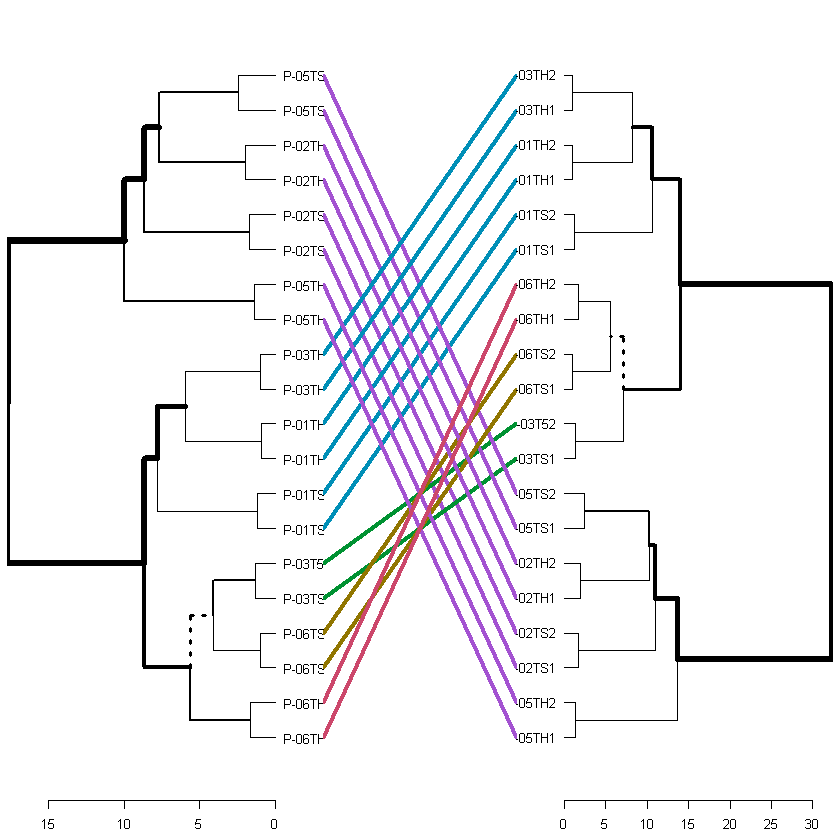

In [399]:
# Compute distance matrix
res.dist <- dist(df, method = "euclidean")

# Compute 2 hierarchical clusterings
hc1 <- hclust(res.dist, method = "complete")
hc2 <- hclust(res.dist, method = "ward.D2")

# Create two dendrograms
dend1 <- as.dendrogram (hc1)
dend2 <- as.dendrogram (hc2)

tanglegram(dend1, dend2)

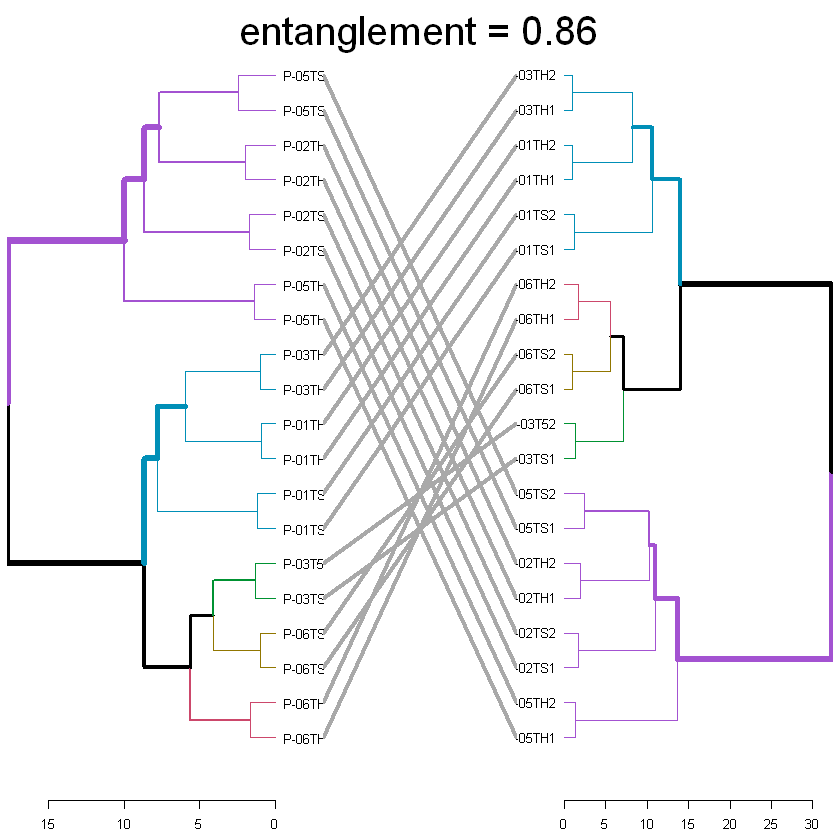

In [400]:
dend_list <- dendlist(dend1, dend2)

tanglegram(dend1, dend2,
  highlight_distinct_edges = FALSE, # Turn-off dashed lines
  common_subtrees_color_lines = FALSE, # Turn-off line colors
  common_subtrees_color_branches = TRUE, # Color common branches 
  main = paste("entanglement =", round(entanglement(dend_list), 2))
  )

Determining Optimal Clusters

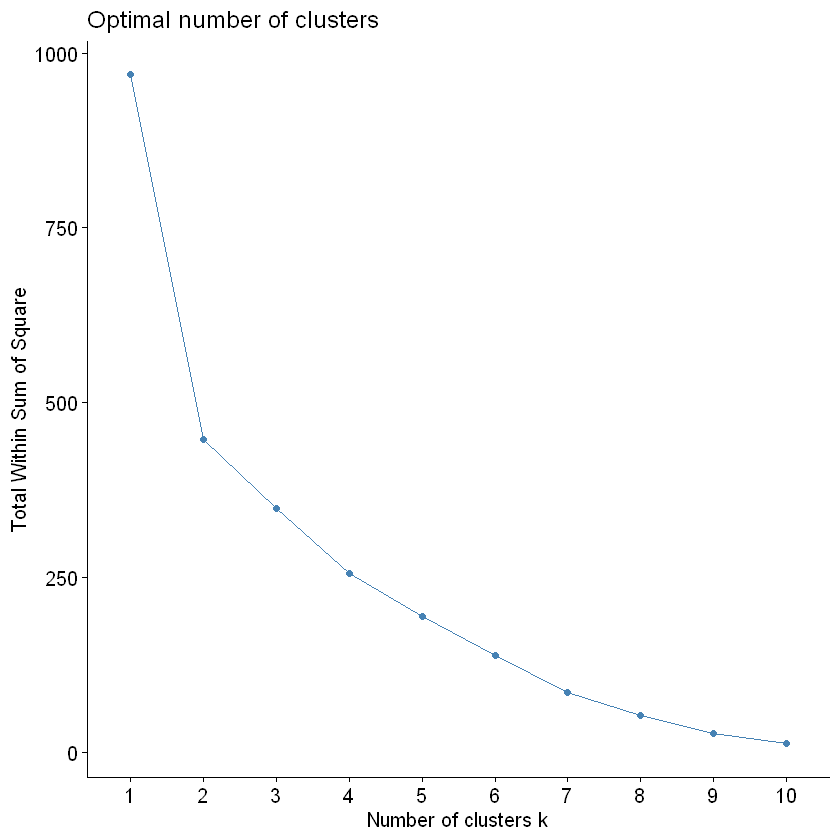

In [401]:
fviz_nbclust(df, FUN = hcut, method = "wss")

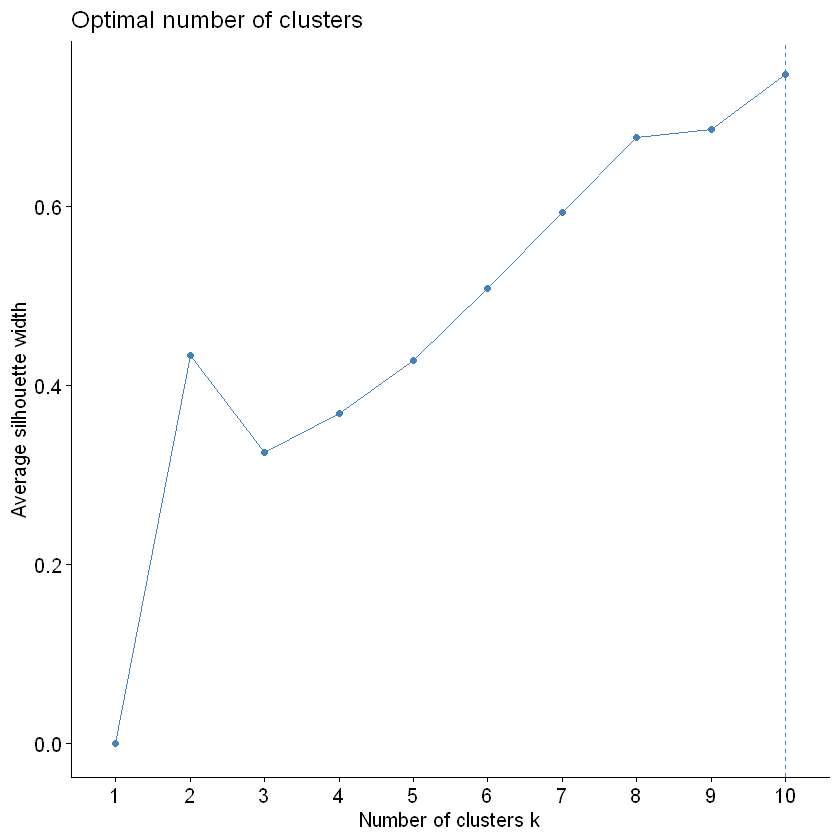

In [402]:
fviz_nbclust(df, FUN = hcut, method = "silhouette")

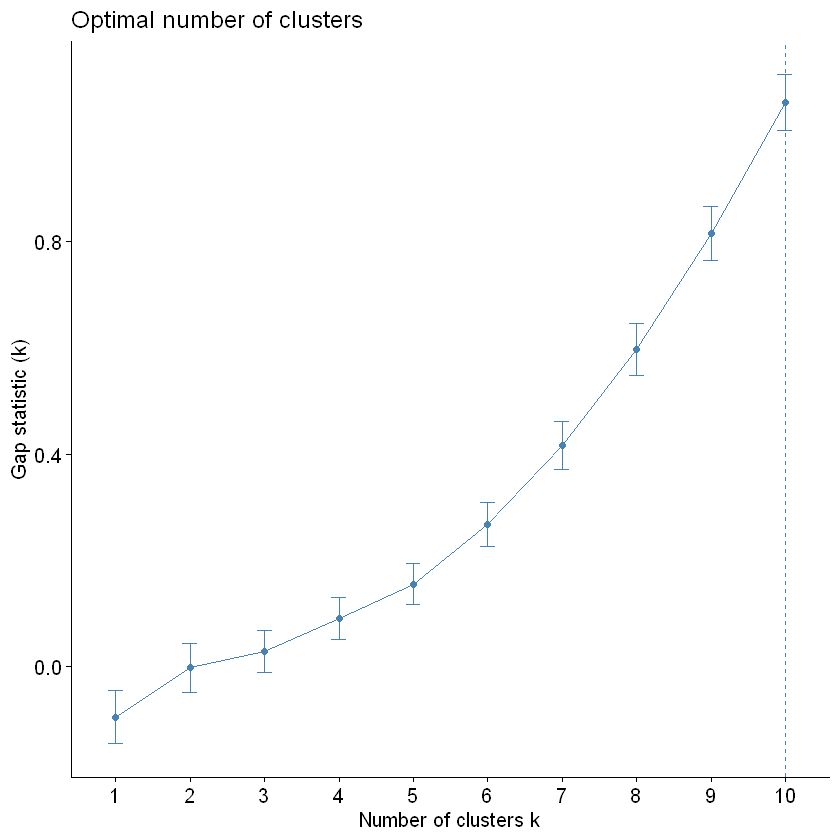

In [403]:
gap_stat <- clusGap(df, FUN = hcut, nstart = 25, K.max = 10, B = 50)
fviz_gap_stat(gap_stat)

In [404]:
df1 <- Datos_1_Num_TH
df1 <- na.omit(df)
df1 <- scale(df)
head(df)

,COT,CIC,pH,CE,CO3,OD,AlT,AlF1,AlF2,AlF3,...,CdT,CdF1,CdF2,CdF3,CdR,PbT,PbF1,PbF2,PbF3,PbR
P-01TS1,1.475565,0.0206106,-1.4881335,0.38510441,0.9689922,-1.8802283,-0.5030046,-0.79723449,-0.15825281,-0.5567138,...,-0.46432481,-0.6619256,-0.8380085,-0.54876625,-0.4687926,-0.4043416,-0.2292138,-0.5991418,-0.5838739,-0.1568954
P-01TS2,1.475565,0.0206106,-1.4881335,0.38510441,0.9689922,-1.8802283,-0.5030046,-0.65562145,-0.08928047,-0.5929454,...,-0.46432481,-0.6258140,-0.8380085,-0.31491700,-0.4857981,-0.4043416,-0.1557831,-0.5914499,-0.5739404,-0.2270608
P-02TS1,1.793432,1.4313032,-1.2157630,-0.02046124,0.9689922,0.6389125,0.9820448,0.02975439,0.95465692,0.2536238,...,-0.08834121,0.7103151,0.1421184,-0.12004262,-0.1694961,0.5366815,0.6781793,0.8013907,-0.2924915,0.7972589
P-02TS2,1.793432,1.4313032,-1.2157630,-0.02046124,0.9689922,0.6389125,0.9820448,0.33879943,1.30667892,0.5431587,...,-0.08834121,0.6019803,0.3381438,0.03585689,-0.1826146,0.5366815,0.6110427,1.0425048,-0.3322255,0.7357410
P-03TS1,0.113912,-0.3959477,-0.1015199,-0.16073207,0.9689922,0.6754218,-0.4855928,-0.50931405,-0.71587670,-1.0726432,...,-0.70523599,-0.6258140,-0.8380085,-0.89954013,-0.5863733,-0.8102614,-0.4935641,-0.8091921,-0.6467859,-0.9250169
P-03T52,0.113912,-0.3959477,-0.1015199,-0.16073207,0.9689922,0.6754218,-0.4855928,-0.70256500,-0.86419648,-1.0428739,...,-0.70523599,-0.6980372,-0.9360212,-0.86056526,-0.5863733,-0.8102614,-0.4799270,-0.8115589,-0.6368525,-0.9539567


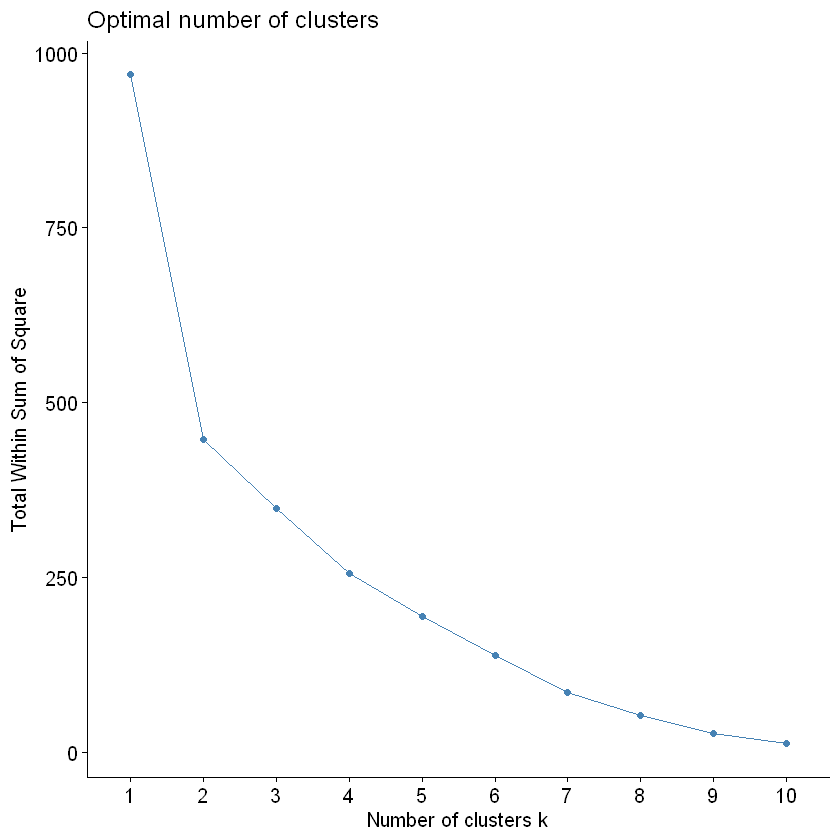

In [406]:
fviz_nbclust(df1, FUN = hcut, method = "wss")